In [2]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import importlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

import charts as charts
import evaluations as evals

# Ignore warnings as they make notebook difficult to read (they are mostly useless)
import warnings

warnings.filterwarnings("ignore")

In [3]:
SEED = 42
np.random.seed(SEED)
CV = 5
F1_AVERAGING = 'micro'
F1_SCORE = f'f1_{F1_AVERAGING}'
WINE_PATH = f'{os.getcwd()}/figures/wine-quality'
STEP_1_PATH = f"{WINE_PATH}/step-1"
STEP_2_PATH = f"{WINE_PATH}/step-2"
STEP_3_PATH = f"{WINE_PATH}/step-3"
STEP_4_PATH = f"{WINE_PATH}/step-4"
STEP_5_PATH = f"{WINE_PATH}/step-5"

charts.setup_plots()

In [4]:
WINE_PATH

'/Users/pavponn/gatech/machine-learning/assignment-3/figures/wine-quality'

In [5]:
df = pd.read_csv('datasets/wine-quality/wine-quality-all.csv', delimiter=';', encoding='utf-8')
X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

X_train_color_df = X_train['color']
X_train_color = X_train_color_df.values.reshape(-1, 1)
X_test_color_df = X_test['color']
X_test_color = X_test['color'].values.reshape(-1, 1)


In [6]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encoded_color = encoder.fit_transform(X_train_color)
X_test_encoded_color = encoder.transform(X_test_color)

# Get the column names after one-hot encoding
encoded_color_columns = encoder.get_feature_names_out(['color'])

# Step 2: Concatenating with Original Data
X_train_reset = X_train.drop(columns=['color']).reset_index(drop=True)
X_train_encoded_color_reset = pd.DataFrame(X_train_encoded_color, columns=encoded_color_columns).reset_index(drop=True)
X_train_e = pd.concat([X_train_reset, X_train_encoded_color_reset], axis=1)

X_test_reset = X_test.drop(columns=['color']).reset_index(drop=True)
X_test_encoded_color_reset = pd.DataFrame(X_test_encoded_color, columns=encoded_color_columns).reset_index(drop=True)
X_test_e = pd.concat([X_test_reset, X_test_encoded_color_reset], axis=1)

X_all_e = pd.concat((X_train_e, X_test_e), axis=0)

# Step 3: Normalization (Standard Scaling)
scaler = StandardScaler()
X_train_normalized = pd.DataFrame(scaler.fit_transform(X_train_e), columns=X_train_e.columns)
X_test_normalized = pd.DataFrame(scaler.transform(X_test_e), columns=X_test_e.columns)

# Combine the normalized data
X_normalized = pd.concat((X_train_normalized, X_test_normalized), axis=0)


In [7]:
X_train = X_train_normalized
X_test = X_test_normalized

In [8]:
importlib.reload(charts)
# avoid creating ths plot again, as it is saved and recreating takes a loooot of time
# charts.pair_plot(X_train, f"{WINE_PATH}/pair_plot.png")

<module 'charts' from '/Users/pavponn/gatech/machine-learning/assignment-3/charts.py'>

In [9]:
# avoid creating ths plot again, as it is saved and recreating takes a loooot of time
# charts.pair_plot(pd.concat([X_train, X_train_color_df], axis=1), f"{WINE_PATH}/pair_plot_with_color.png", hue='color')

In [10]:
# avoid creating ths plot again, as it is saved and recreating takes a loooot of time
# charts.pair_plot(pd.concat([X_train, y_train], axis=1), f"{WINE_PATH}/pair_plot_with_label.png", hue='quality')

# Step 1 (Clustering algorithms)

## K-Means

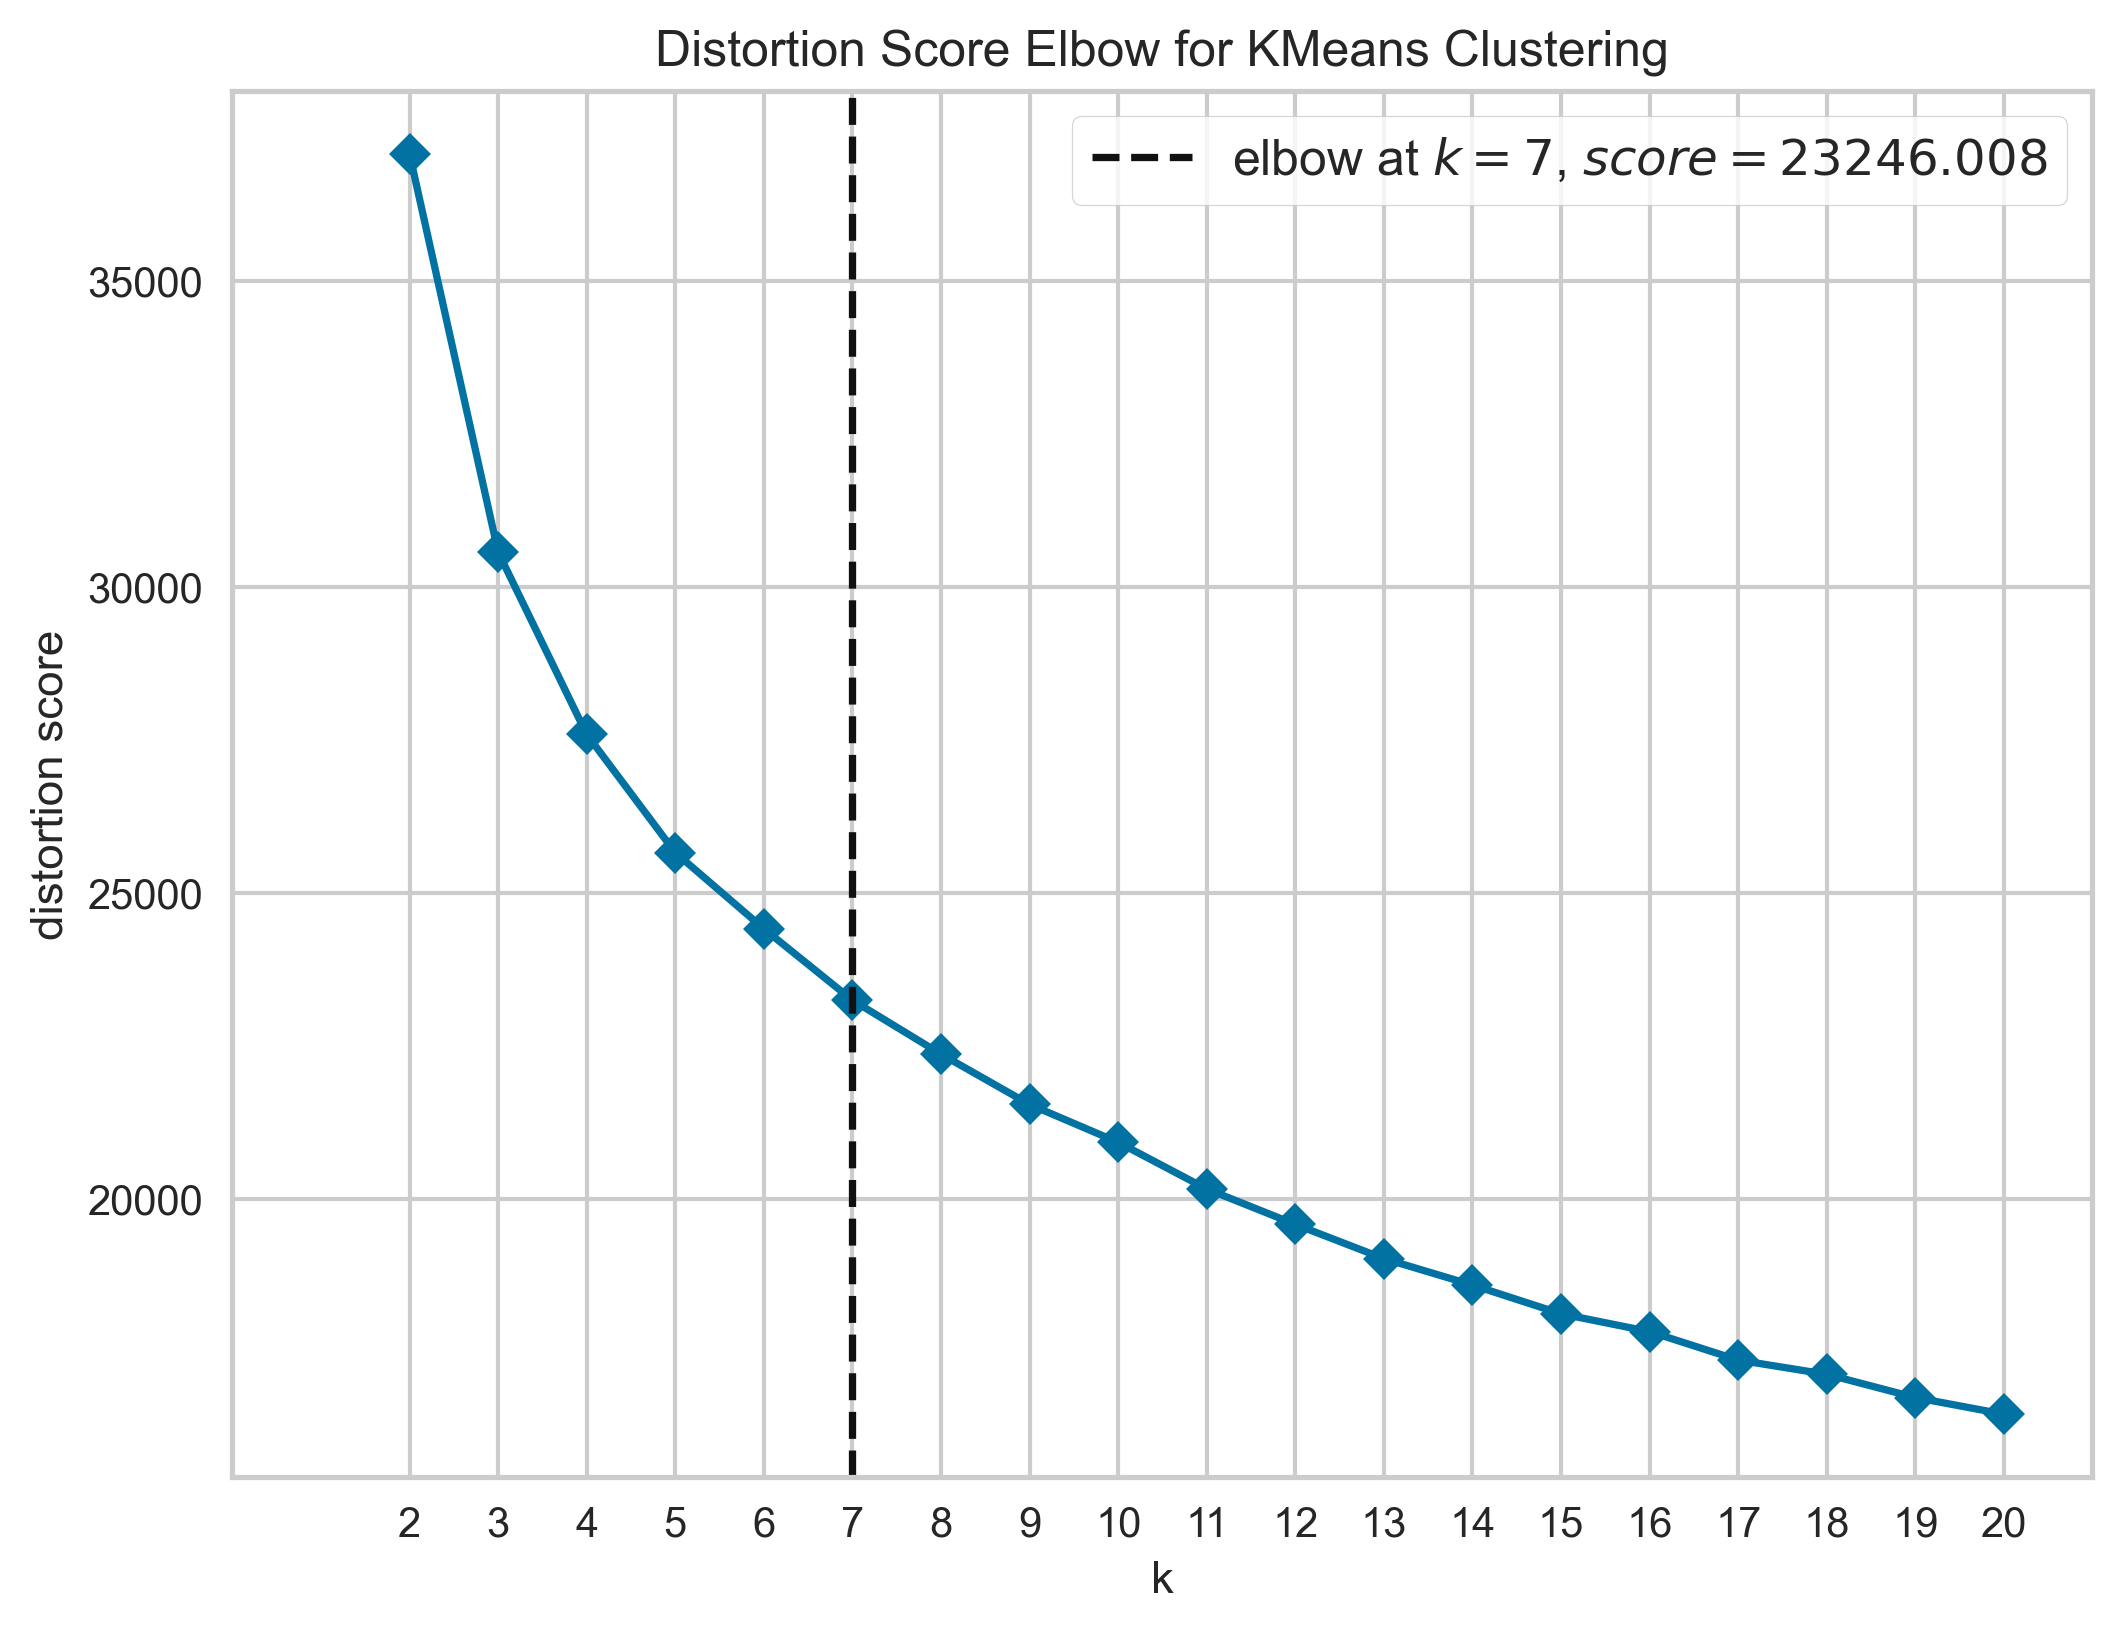

In [11]:
importlib.reload(charts)
# Using distortion/inertia
charts.k_means_visualize(X_train,
                         output_path=f"{STEP_1_PATH}/k_means_distortion.png",
                         seed=SEED,
                         metric='distortion',
                         locate_elbow=True)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


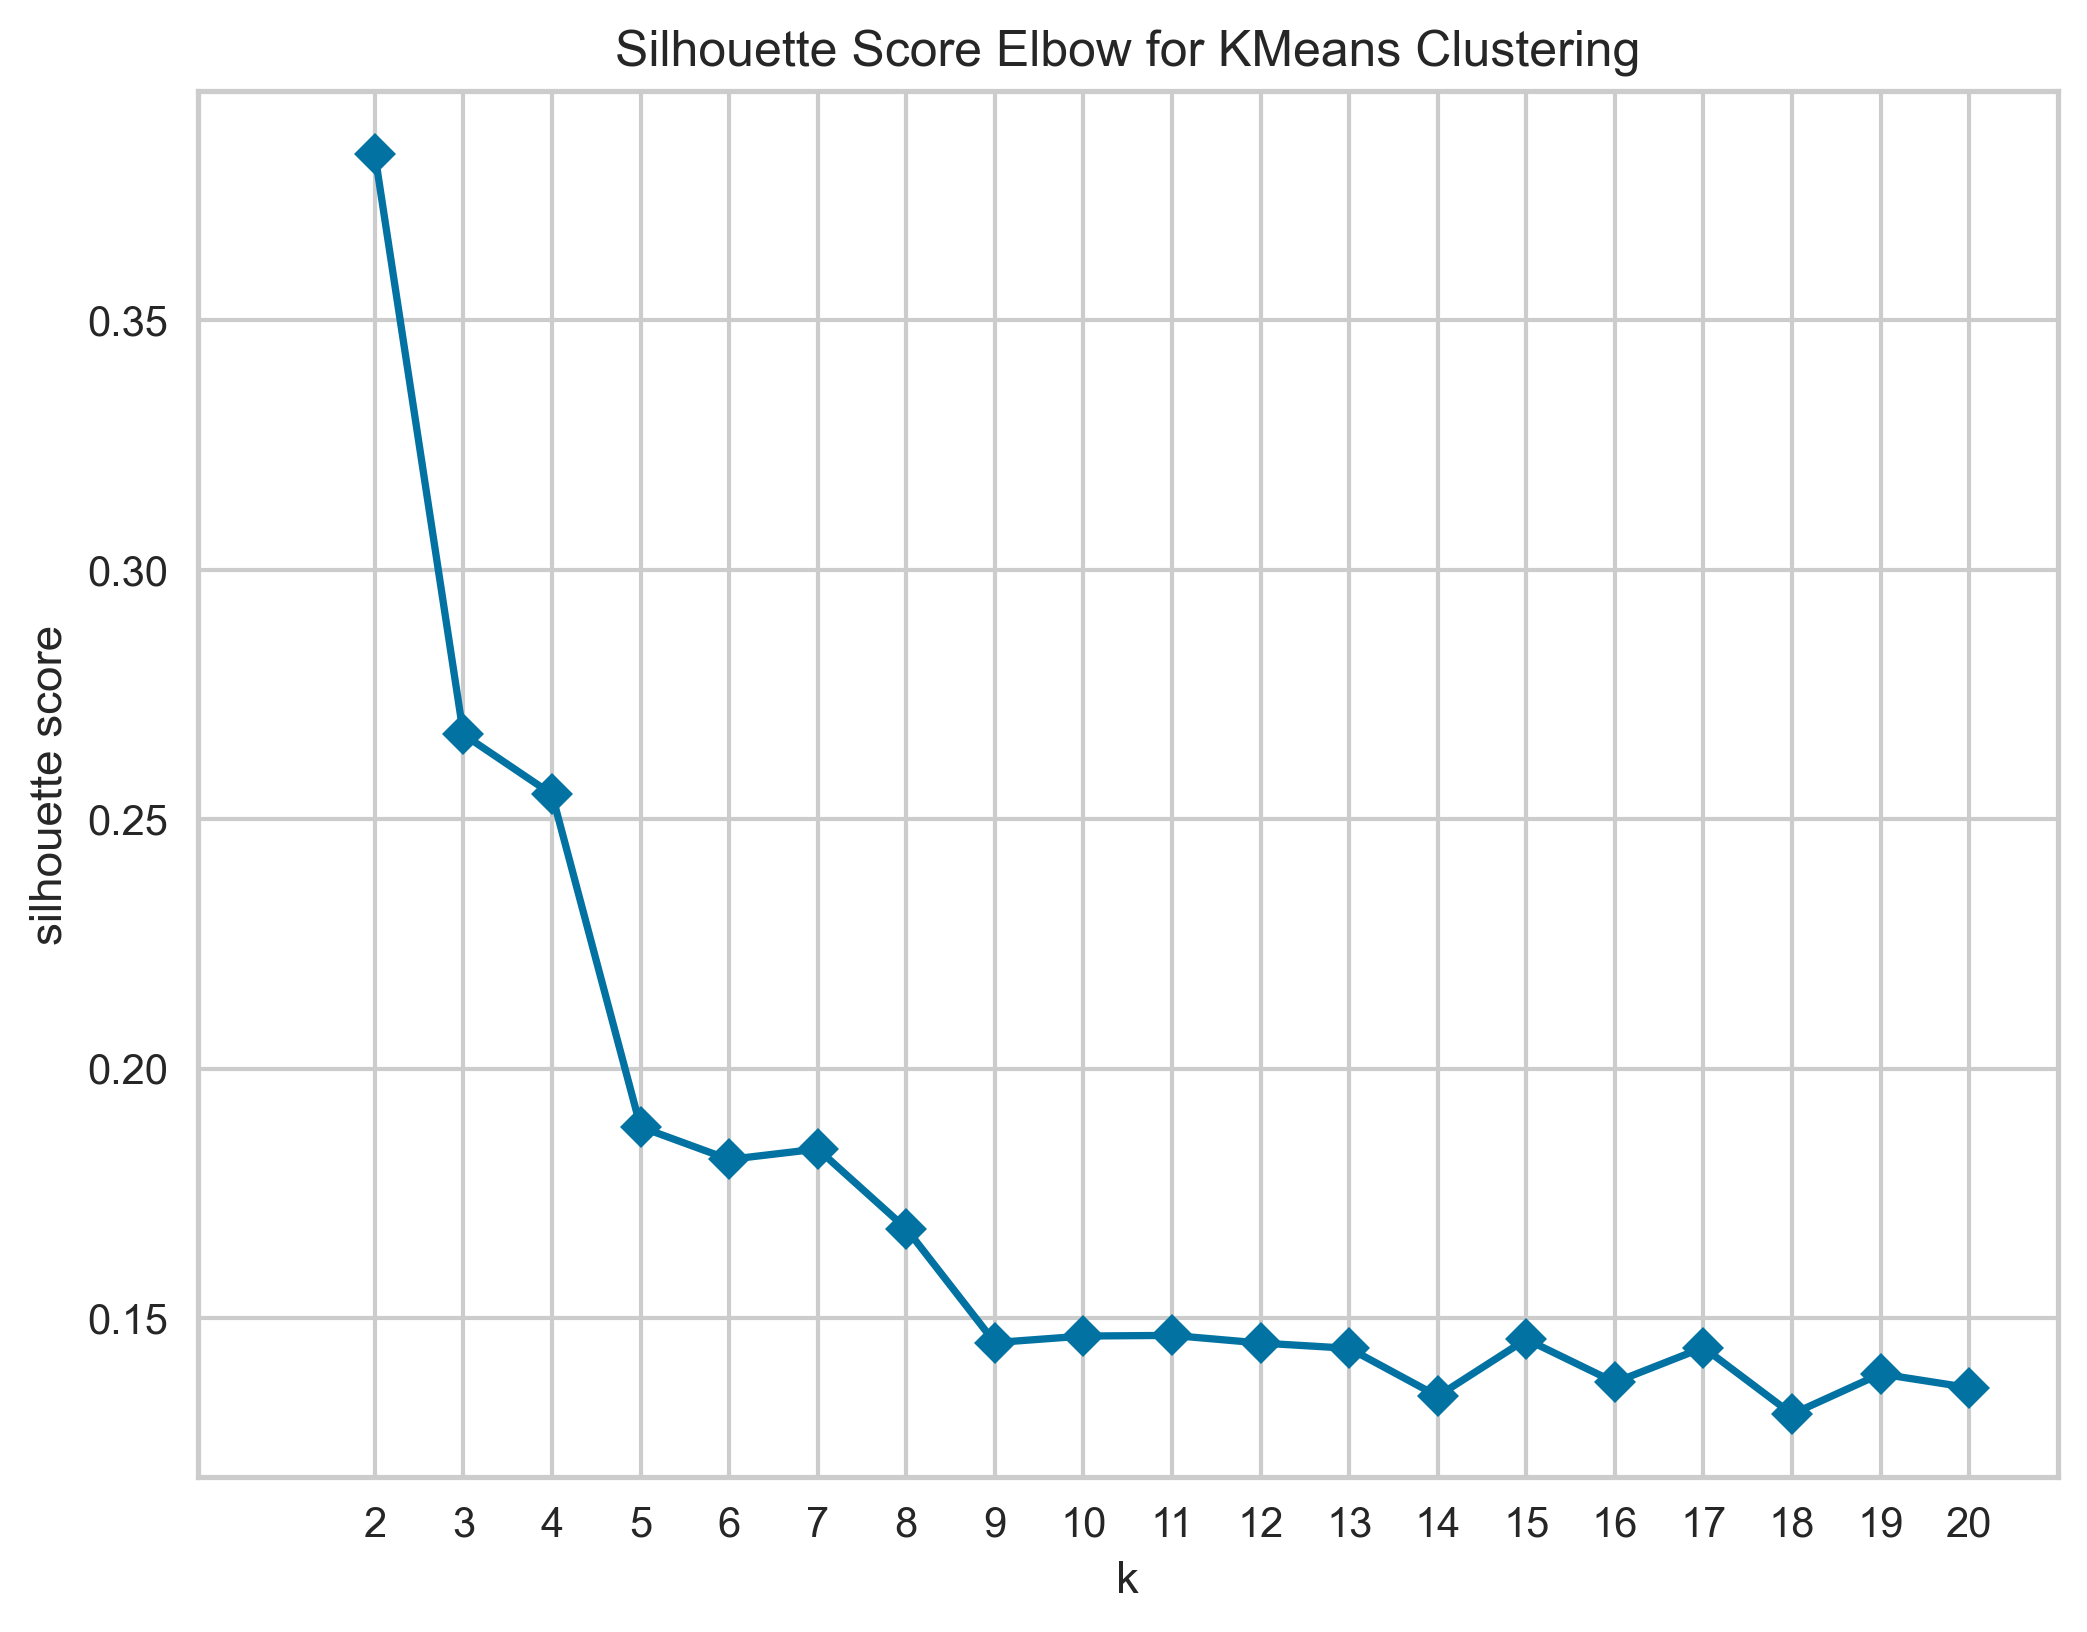

In [12]:
charts.k_means_visualize(X_train,
                         output_path=f"{STEP_1_PATH}/k_means_silhouette.png",
                         seed=SEED,
                         metric='silhouette',
                         locate_elbow=False)

## Expectation Maximization

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


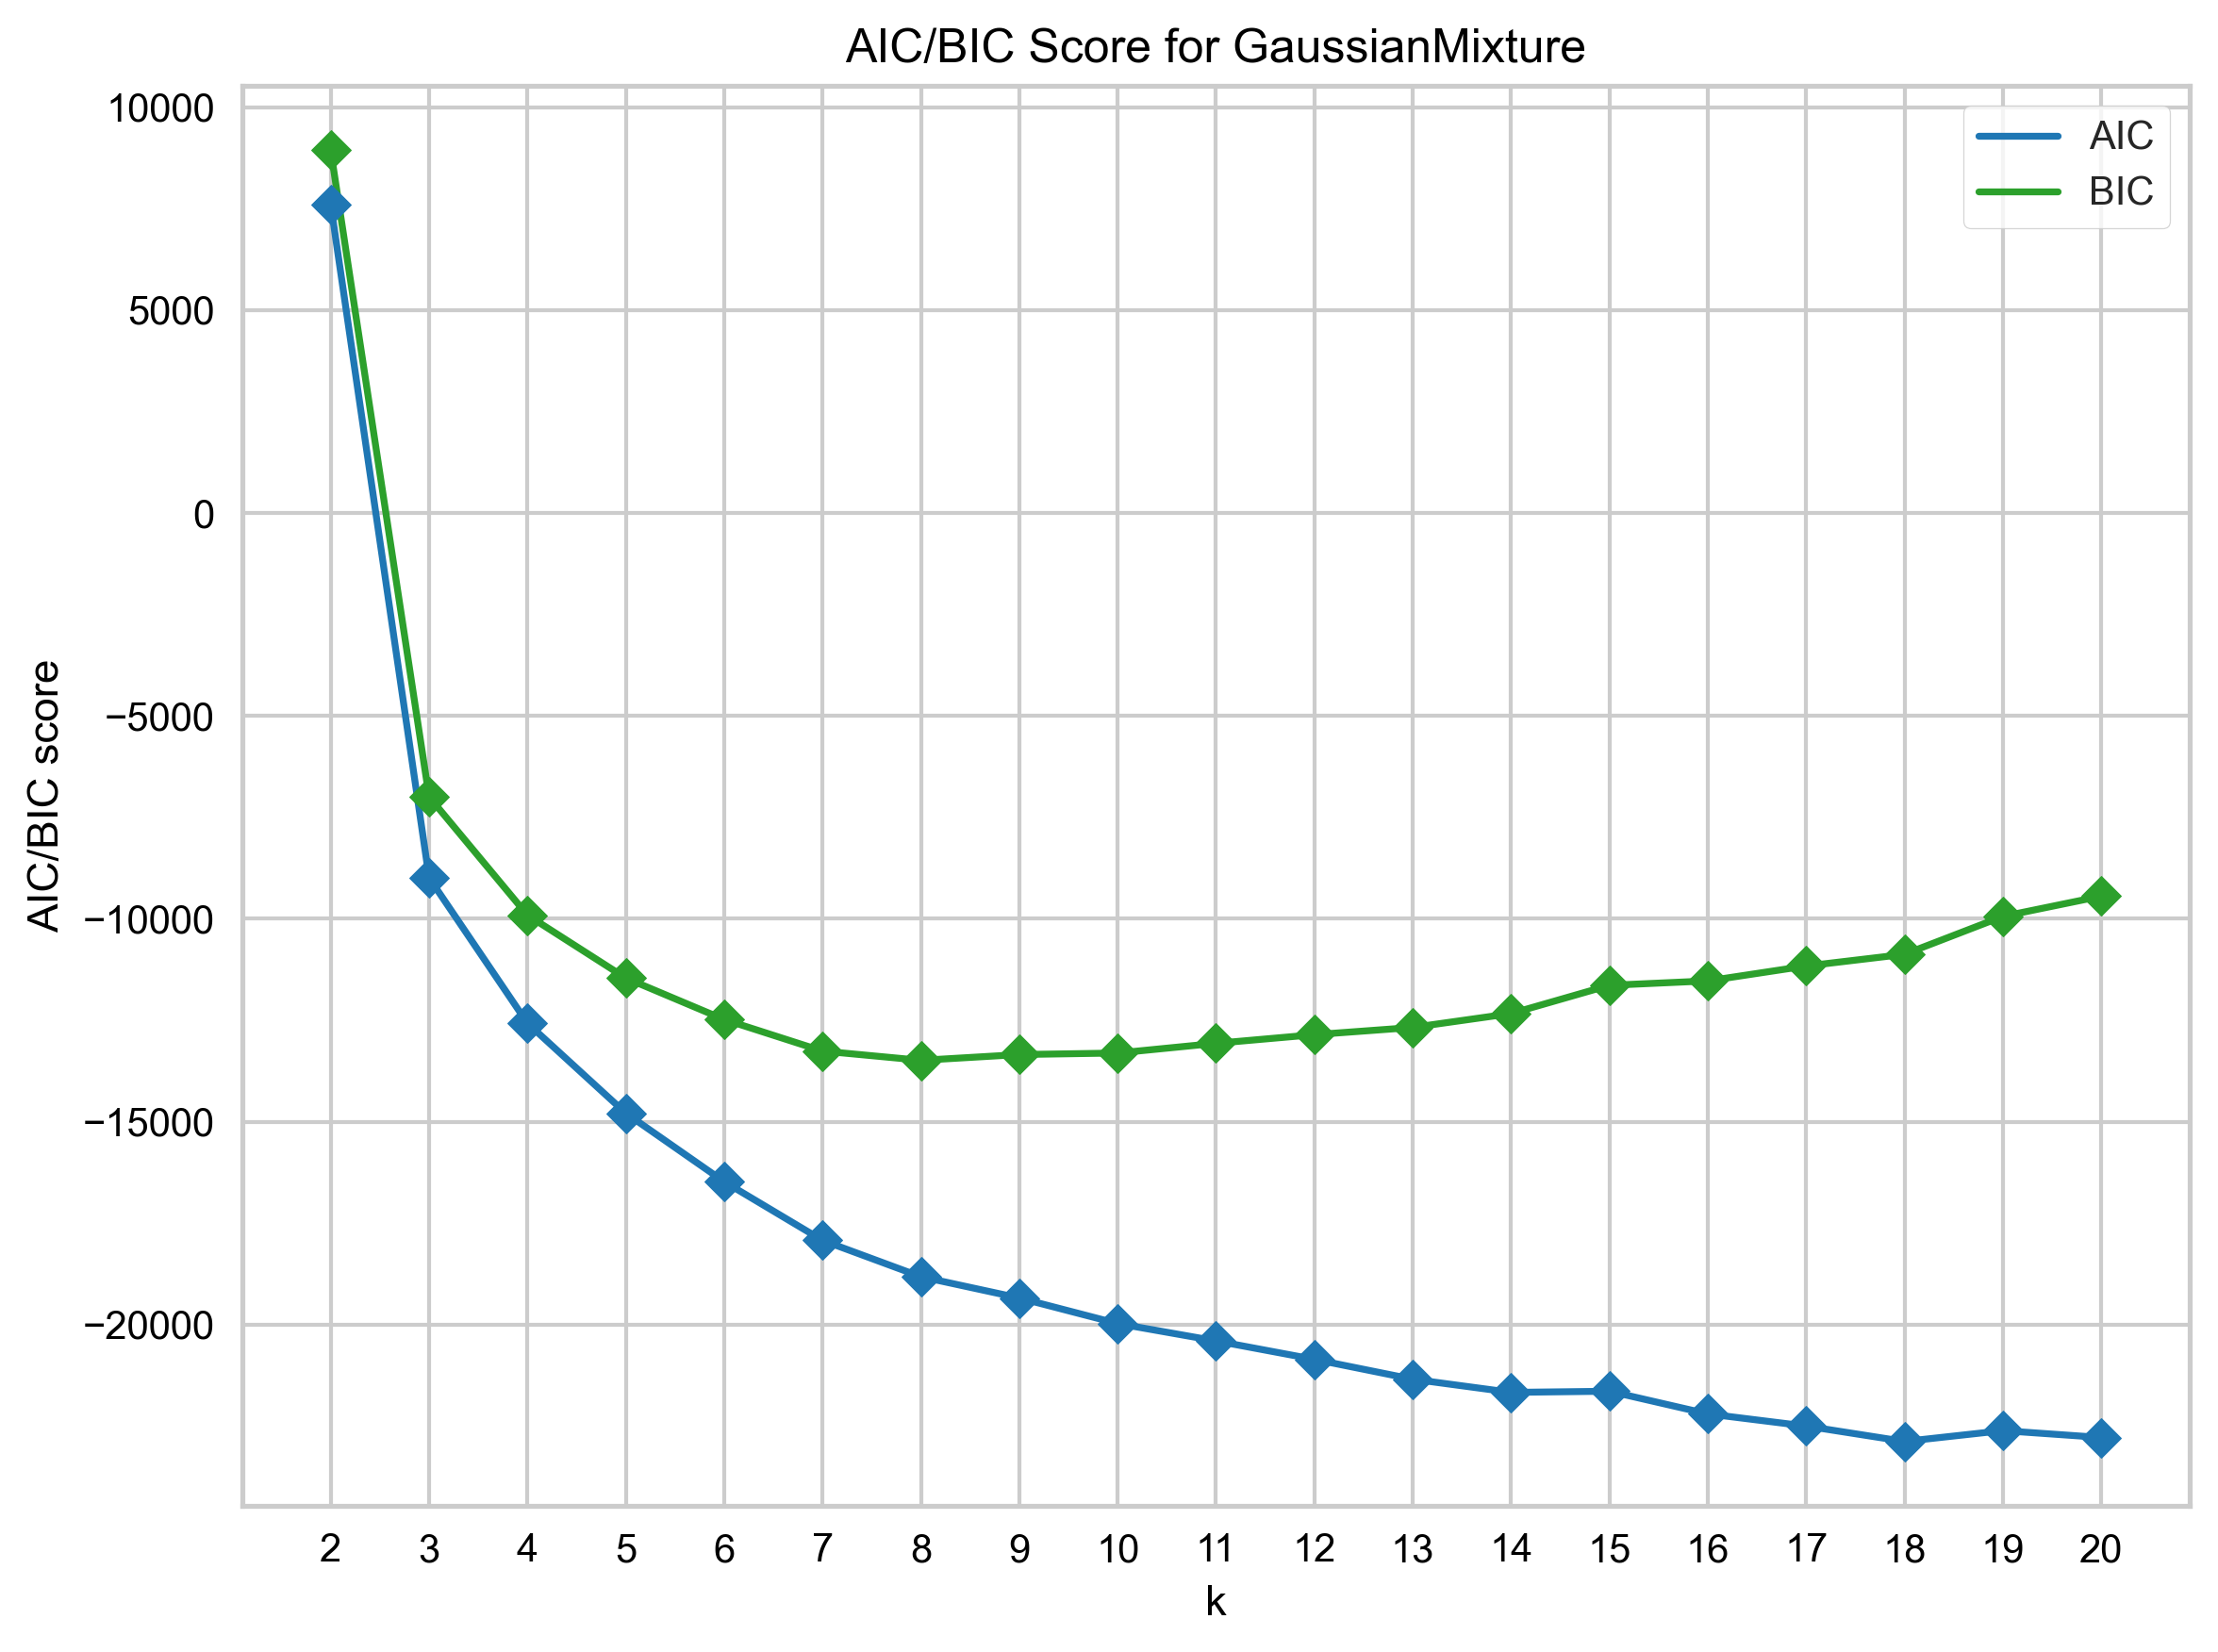

In [13]:
importlib.reload(charts)
charts.gmm_visualize_aic_bic(
    X_data=X_train,
    output_path=f"{STEP_1_PATH}/em_aic_bic.png",
    seed=SEED,
    k_max=20,
    n_init=10,
)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


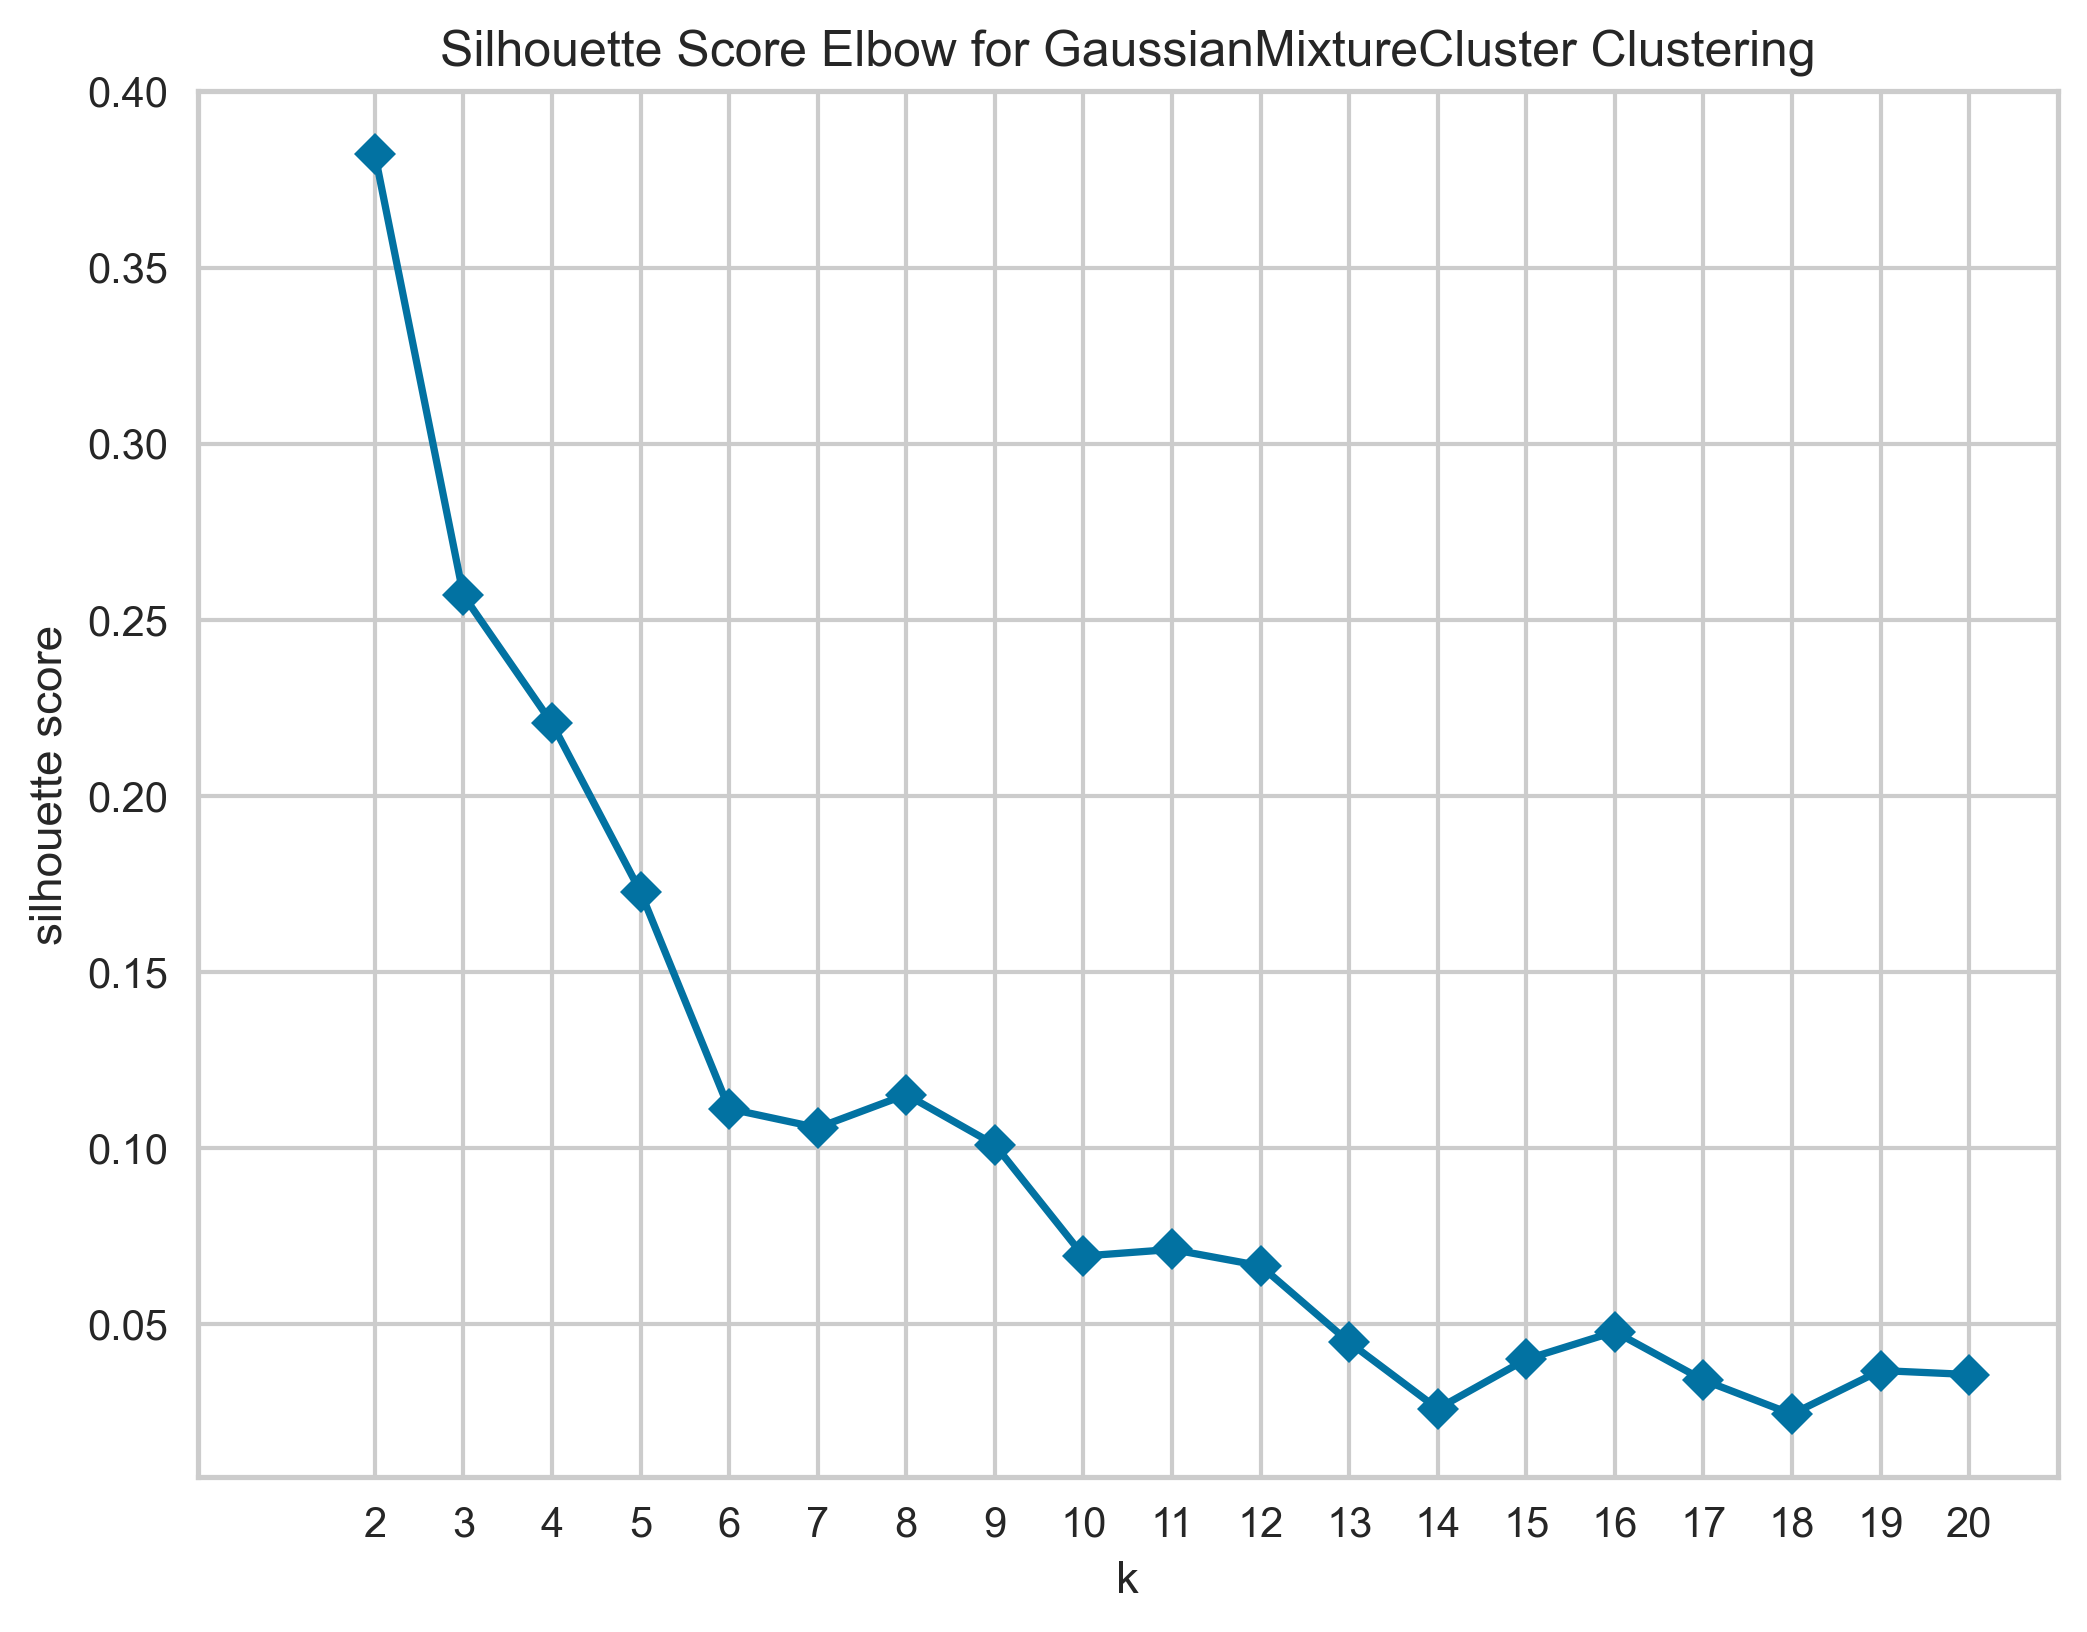

In [14]:
importlib.reload(charts)
charts.gmm_visualize(
    X_data=X_train,
    output_path=f"{STEP_1_PATH}/em_silhouette.png",
    metric='silhouette',
    seed=SEED,
    k_max=20,
    n_init=10,
    locate_elbow=False,
)

## Evaluation

In [15]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

importlib.reload(evals)

#  evaluation
evals.evaluate_models(
    models=[
        ('KMeans (k=7)', KMeans(random_state=SEED, n_clusters=7)),
        ('KMeans (k=2)', KMeans(random_state=SEED, n_clusters=2)),
        ('GMM (k=8)', GaussianMixture(random_state=SEED, n_components=8, n_init=10)),
        ('GMM (k=2)', GaussianMixture(random_state=SEED, n_components=2, n_init=10)),
    ],
    X_data=X_train,
    labels=y_train
)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Rand Index  V Measure  Mutual Information  \
KMeans (k=7) 0    0.625605   0.060003            0.092530   
KMeans (k=2) 0    0.456825   0.009128            0.008436   
GMM (k=8)    0    0.625141   0.063513            0.099790   
GMM (k=2)    0    0.457064   0.008689            0.008035   

                Fowlkes-Mallows index  
KMeans (k=7) 0               0.262941  
KMeans (k=2) 0               0.452000  
GMM (k=8)    0               0.269107  
GMM (k=2)    0               0.451394

In [16]:
# Colors evaluation
evals.evaluate_models(
    models=[
        ('KMeans (k=7)', KMeans(random_state=SEED, n_clusters=7)),
        ('KMeans (k=2)', KMeans(random_state=SEED, n_clusters=2)),
        ('GMM (k=8)', GaussianMixture(random_state=SEED, n_components=8, n_init=10)),
        ('GMM (k=2)', GaussianMixture(random_state=SEED, n_components=2, n_init=10)),
    ],
    X_data=X_train,
    labels=X_train_color_df
)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Rand Index  V Measure  Mutual Information  \
KMeans (k=7) 0    0.546300   0.461725            0.545464   
KMeans (k=2) 0    0.995311   0.971525            0.547323   
GMM (k=8)    0    0.553262   0.465850            0.563879   
GMM (k=2)    0    0.999530   0.996450            0.562005   

                Fowlkes-Mallows index  
KMeans (k=7) 0               0.521868  
KMeans (k=2) 0               0.996243  
GMM (k=8)    0               0.532454  
GMM (k=2)    0               0.999623

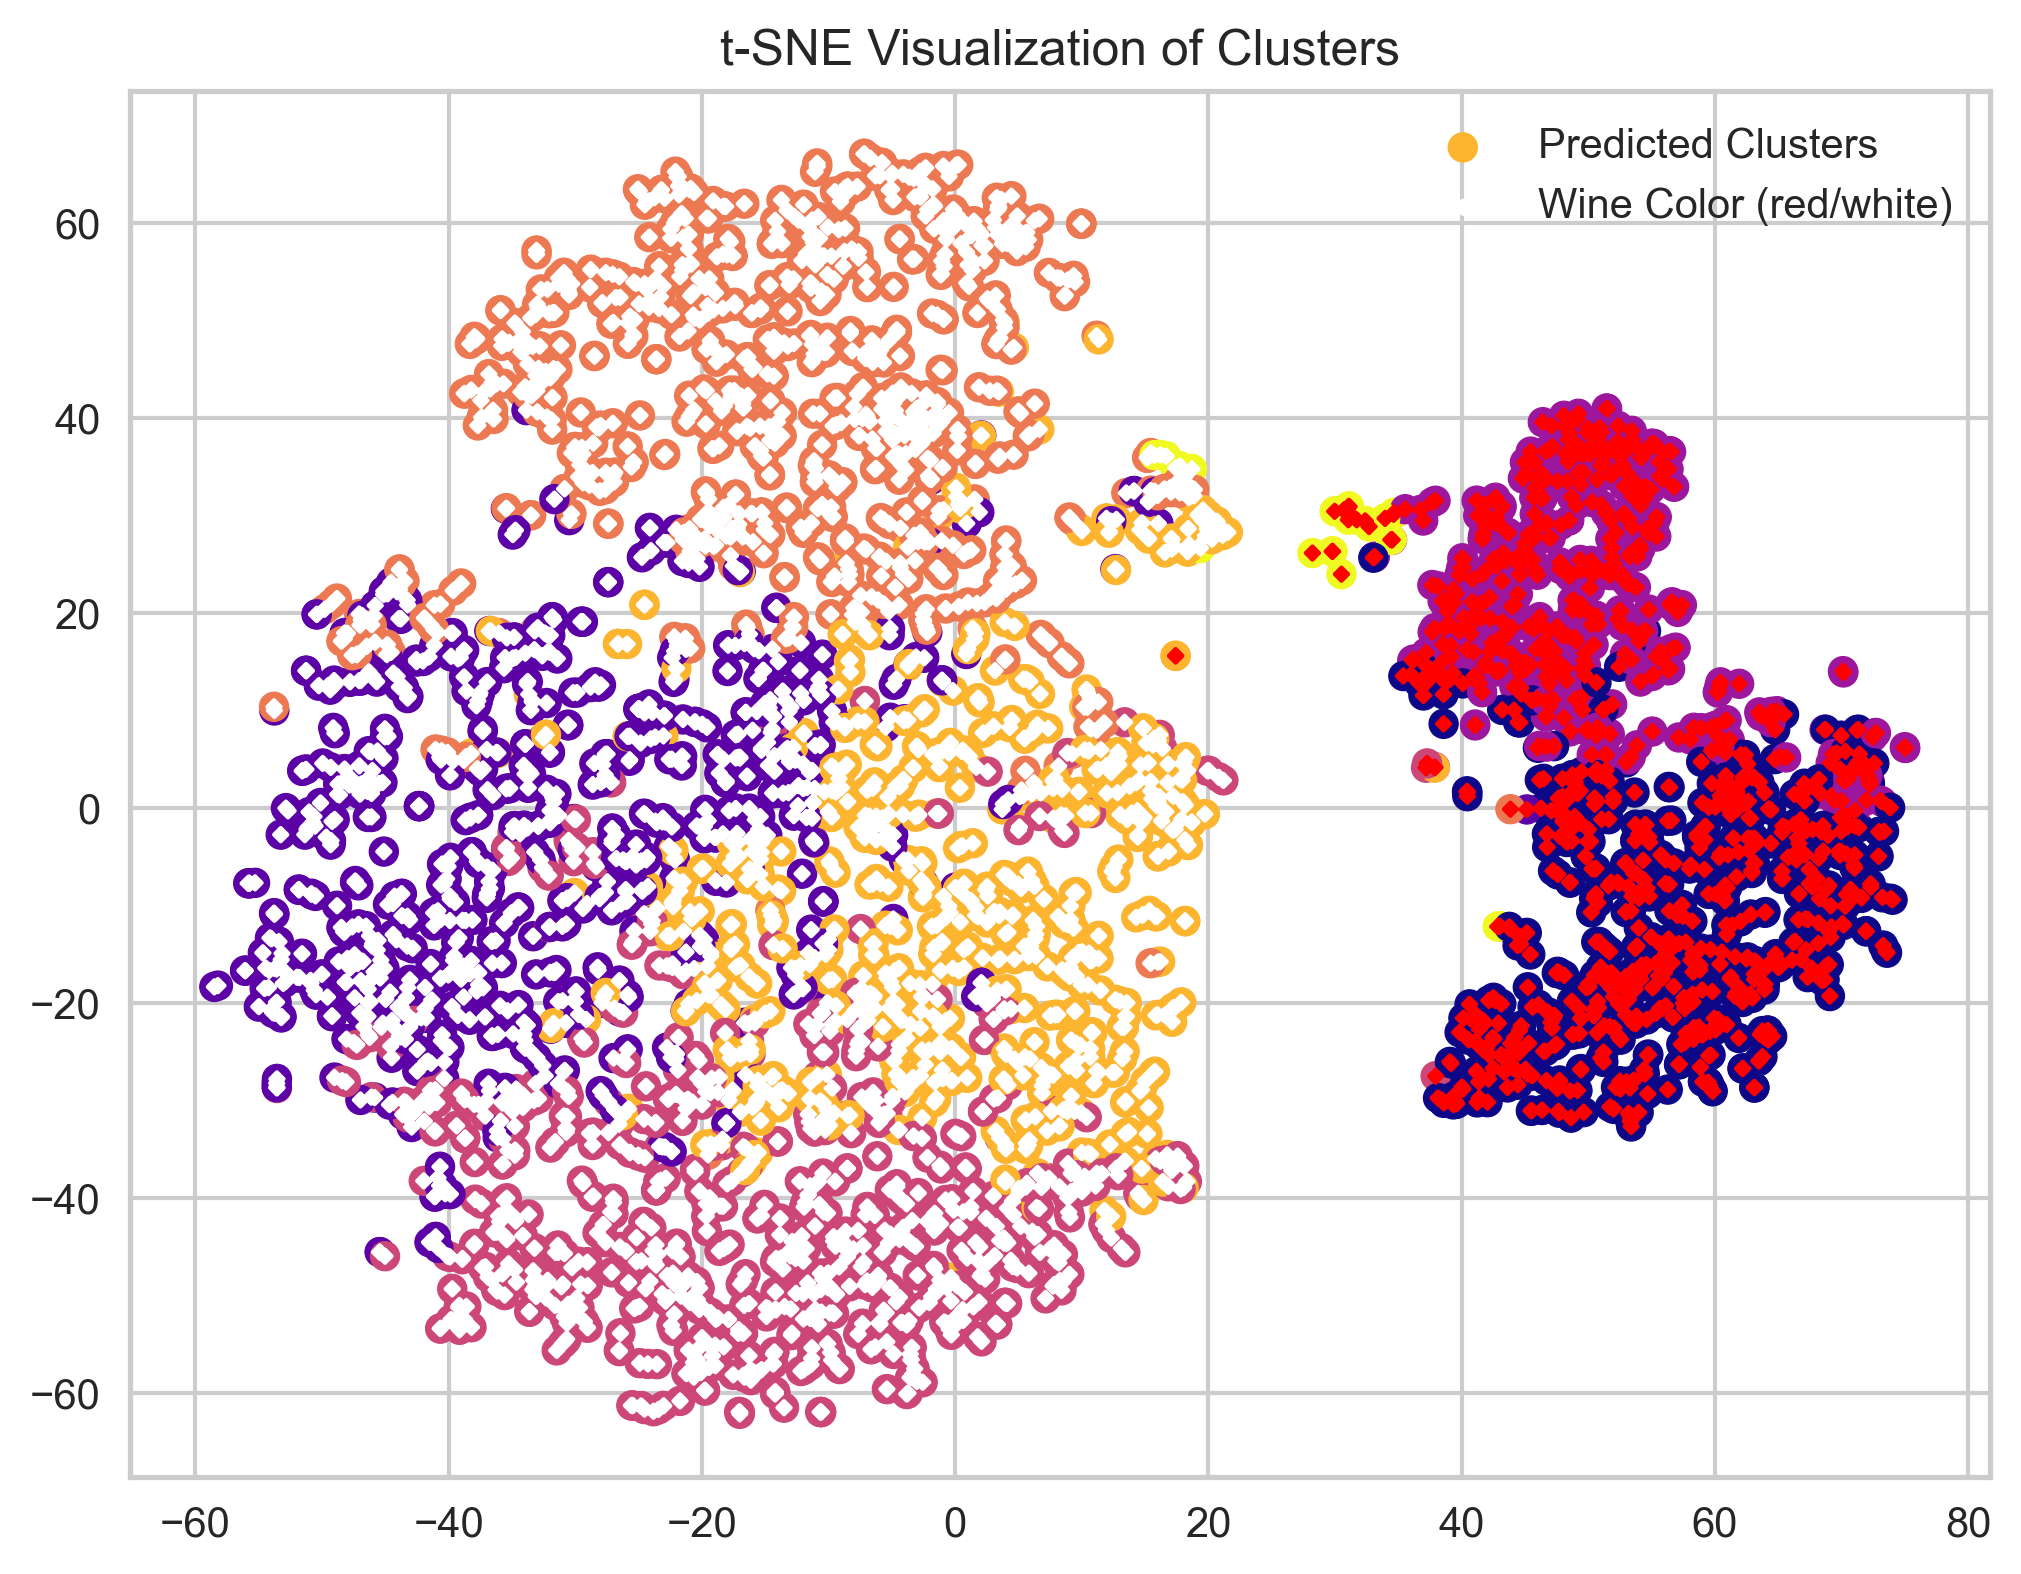

In [17]:
importlib.reload(charts)
charts.visualize_clusters_with_tsne(
    model=KMeans(random_state=SEED, n_clusters=7),
    X_data=X_train,
    labels=X_train_color_df,  # visualize with wine colours
    output_path=f"{STEP_1_PATH}/k_means_clusters_visualization.png",
    labels_name='Wine Color (red/white)',
    seed=SEED,
)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


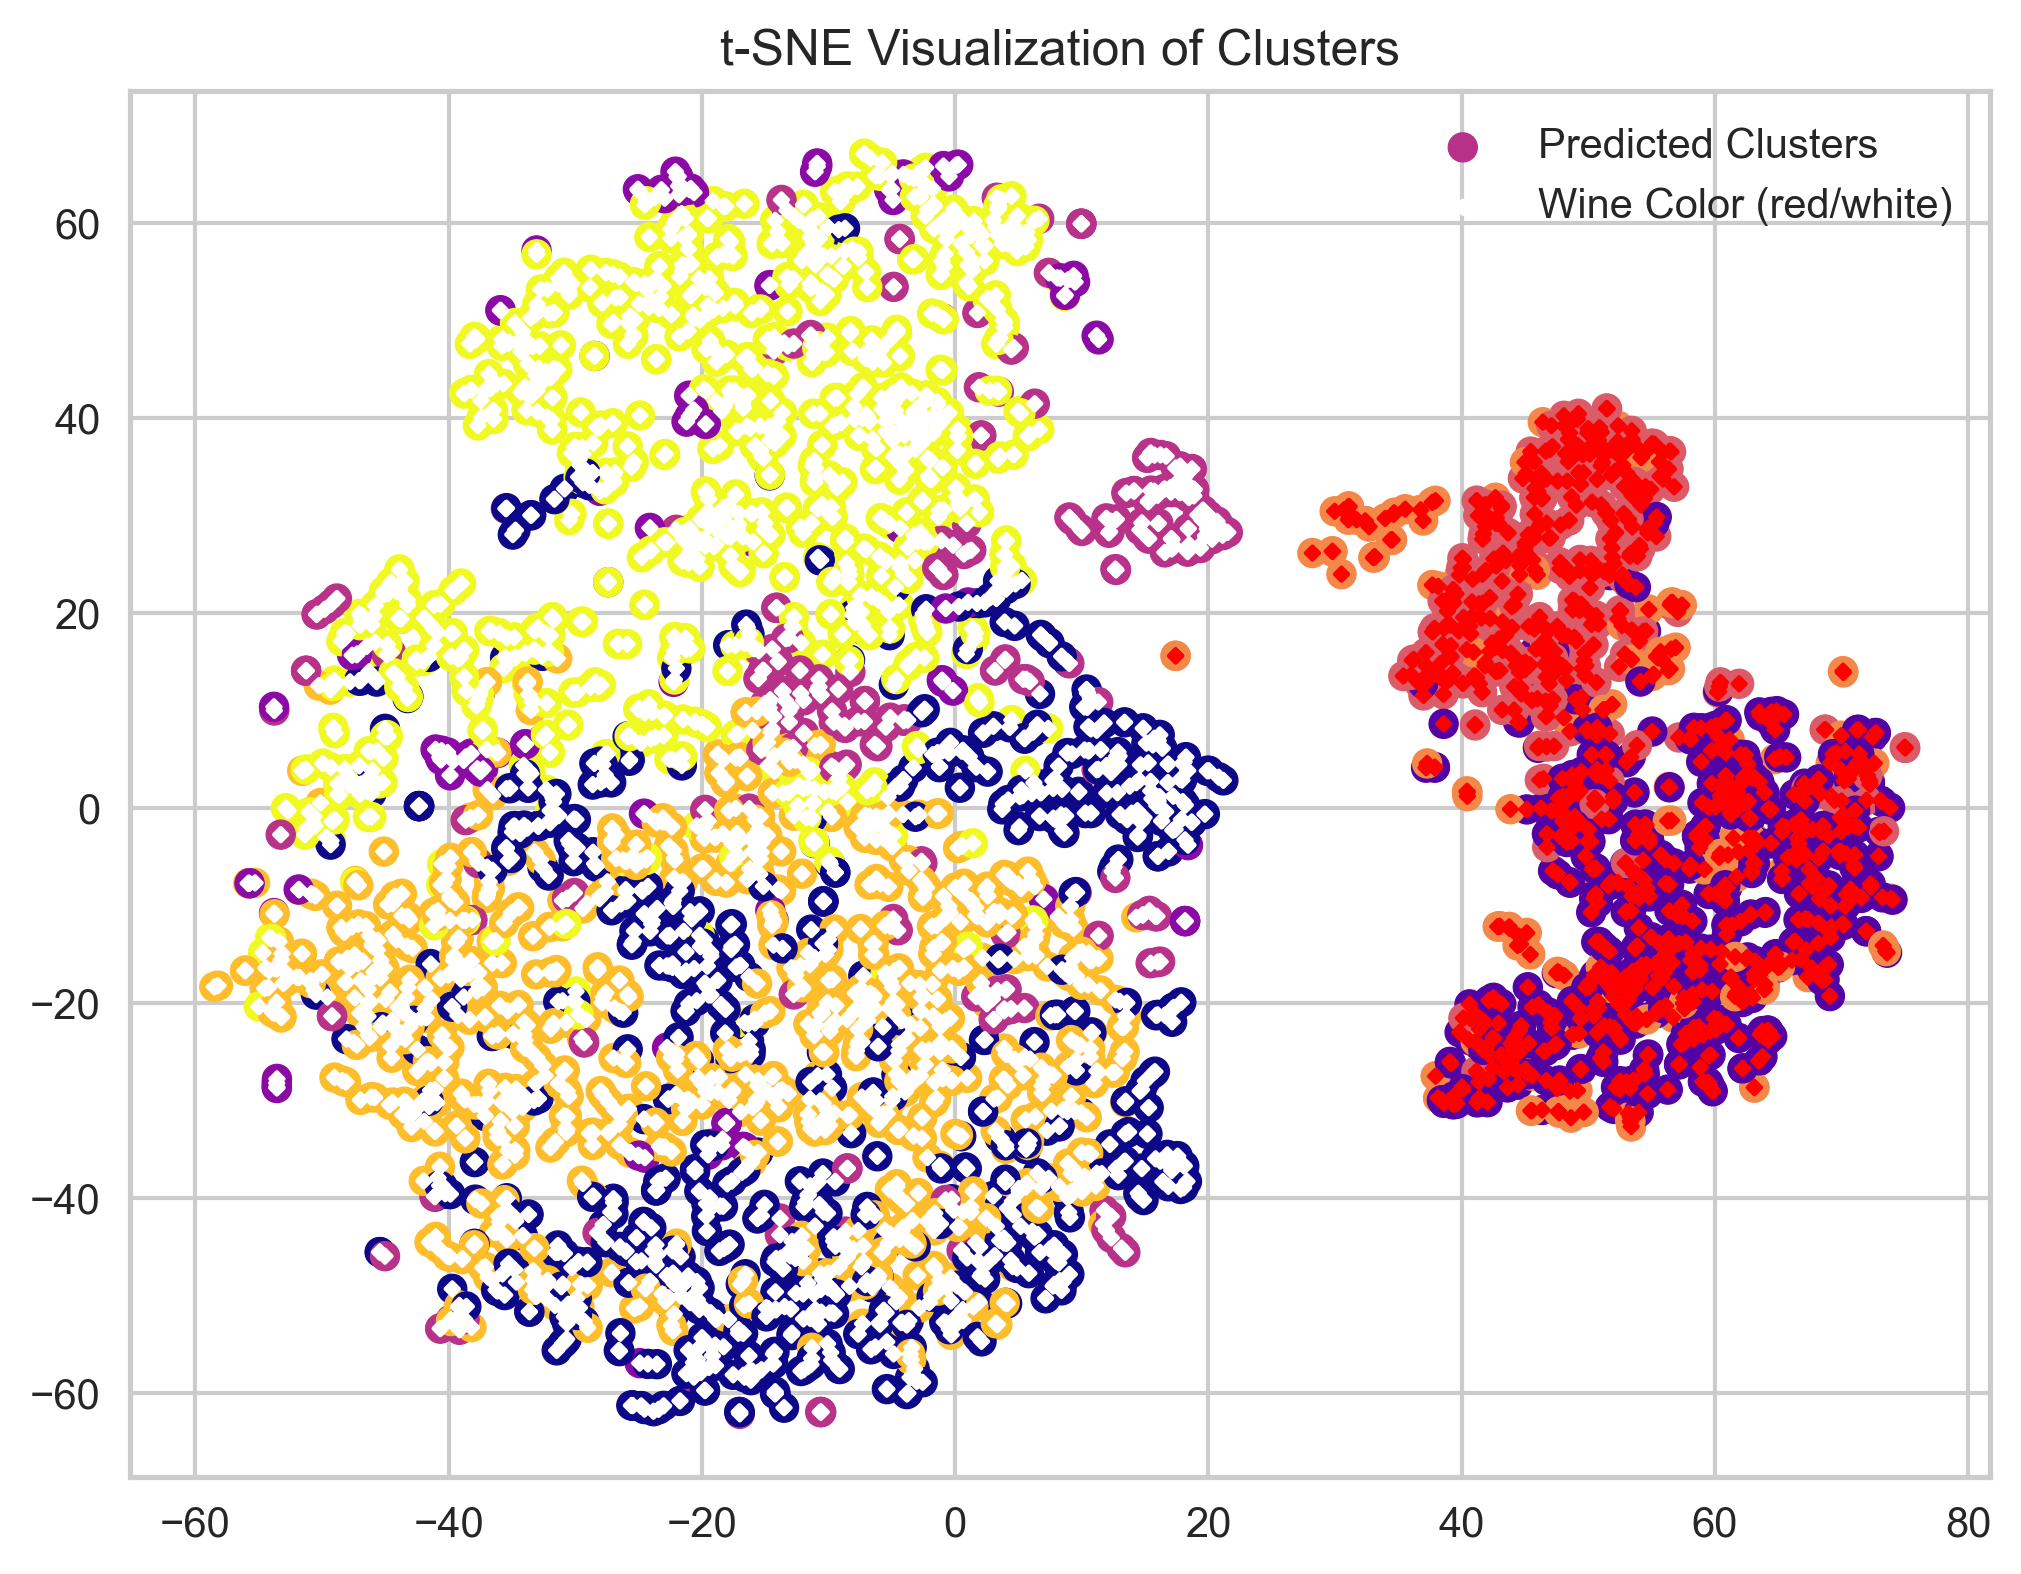

In [18]:
importlib.reload(charts)
charts.visualize_clusters_with_tsne(
    model=GaussianMixture(random_state=SEED, n_components=8, n_init=10),
    X_data=X_train,
    labels=X_train_color_df,  # visualize with wine colours
    output_path=f"{STEP_1_PATH}/em_clusters_visualization.png",
    labels_name='Wine Color (red/white)',
    seed=SEED,
)

# Step 2

## PCA

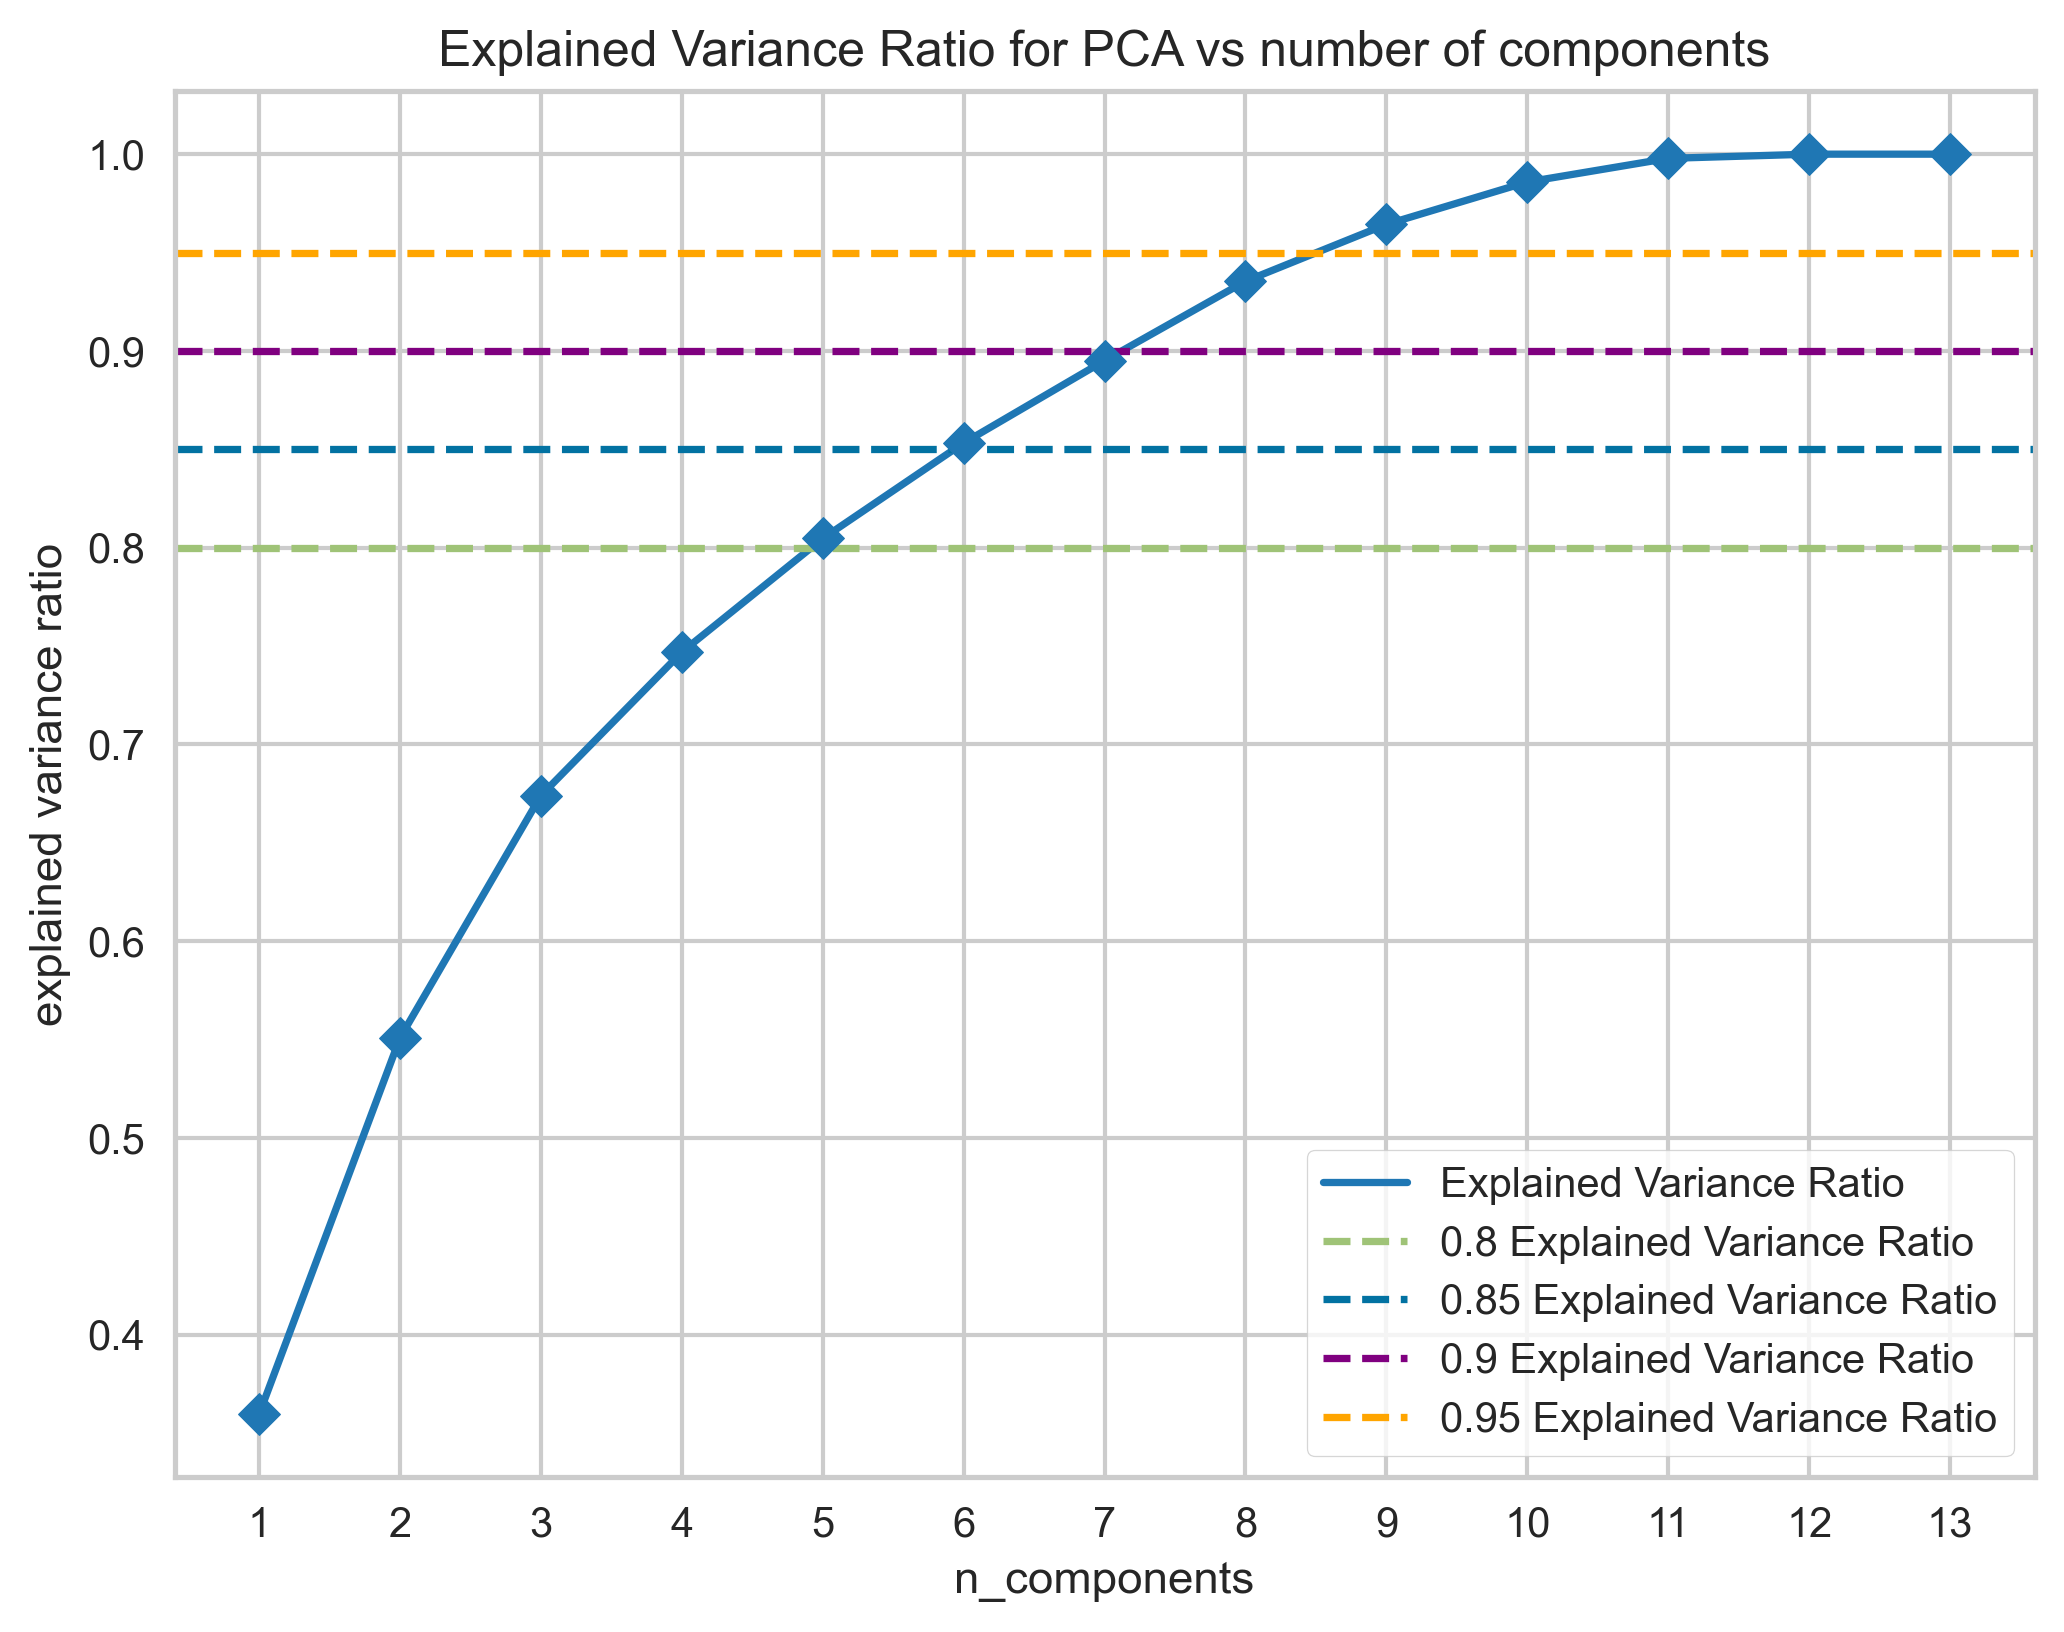

In [19]:
importlib.reload(charts)
charts.pca_visualize_explained_variance_ratio(X_train, f"{STEP_2_PATH}/pca_explained_variance_ratio.png")

Eigen values: [4.67521009e+00 2.48738217e+00 1.60133020e+00 9.48270176e-01
 7.51036001e-01 6.31260104e-01 5.44208932e-01 5.24622621e-01
 3.75842006e-01 2.80089850e-01 1.56053078e-01 2.77500003e-02
 2.75424632e-33]


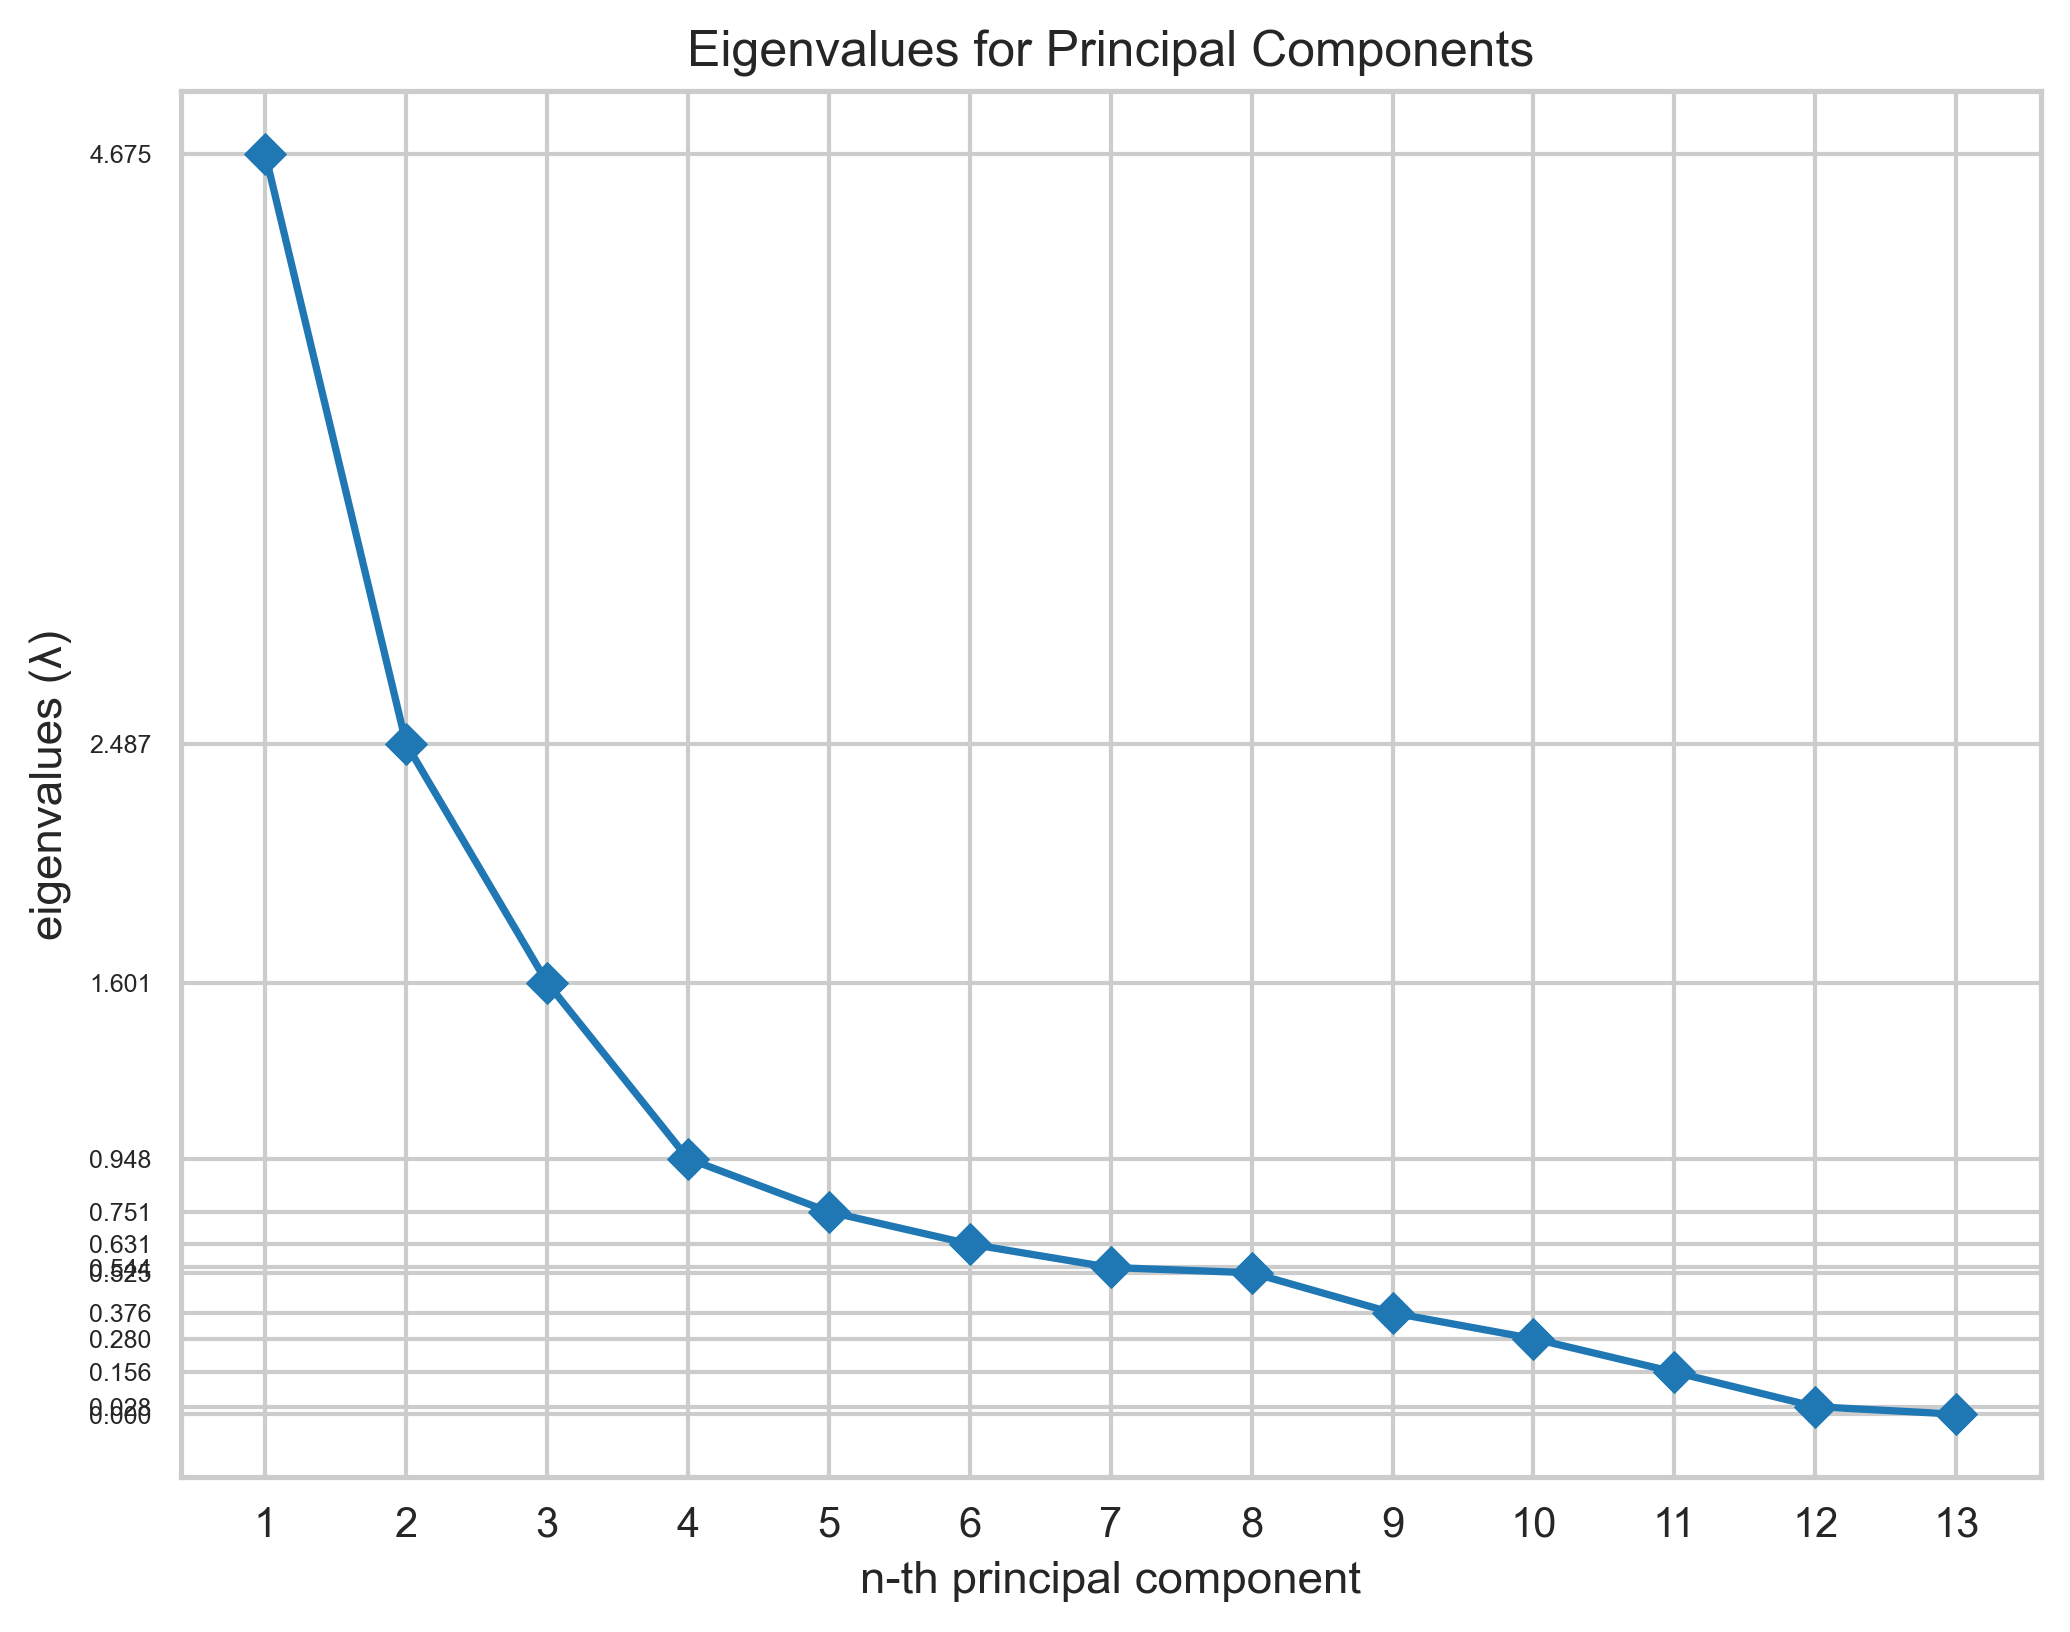

In [20]:
importlib.reload(charts)
charts.pca_visualize_eigenvalues(X_train, f"{STEP_2_PATH}/pca_eigenvalues.png")

## ICA

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


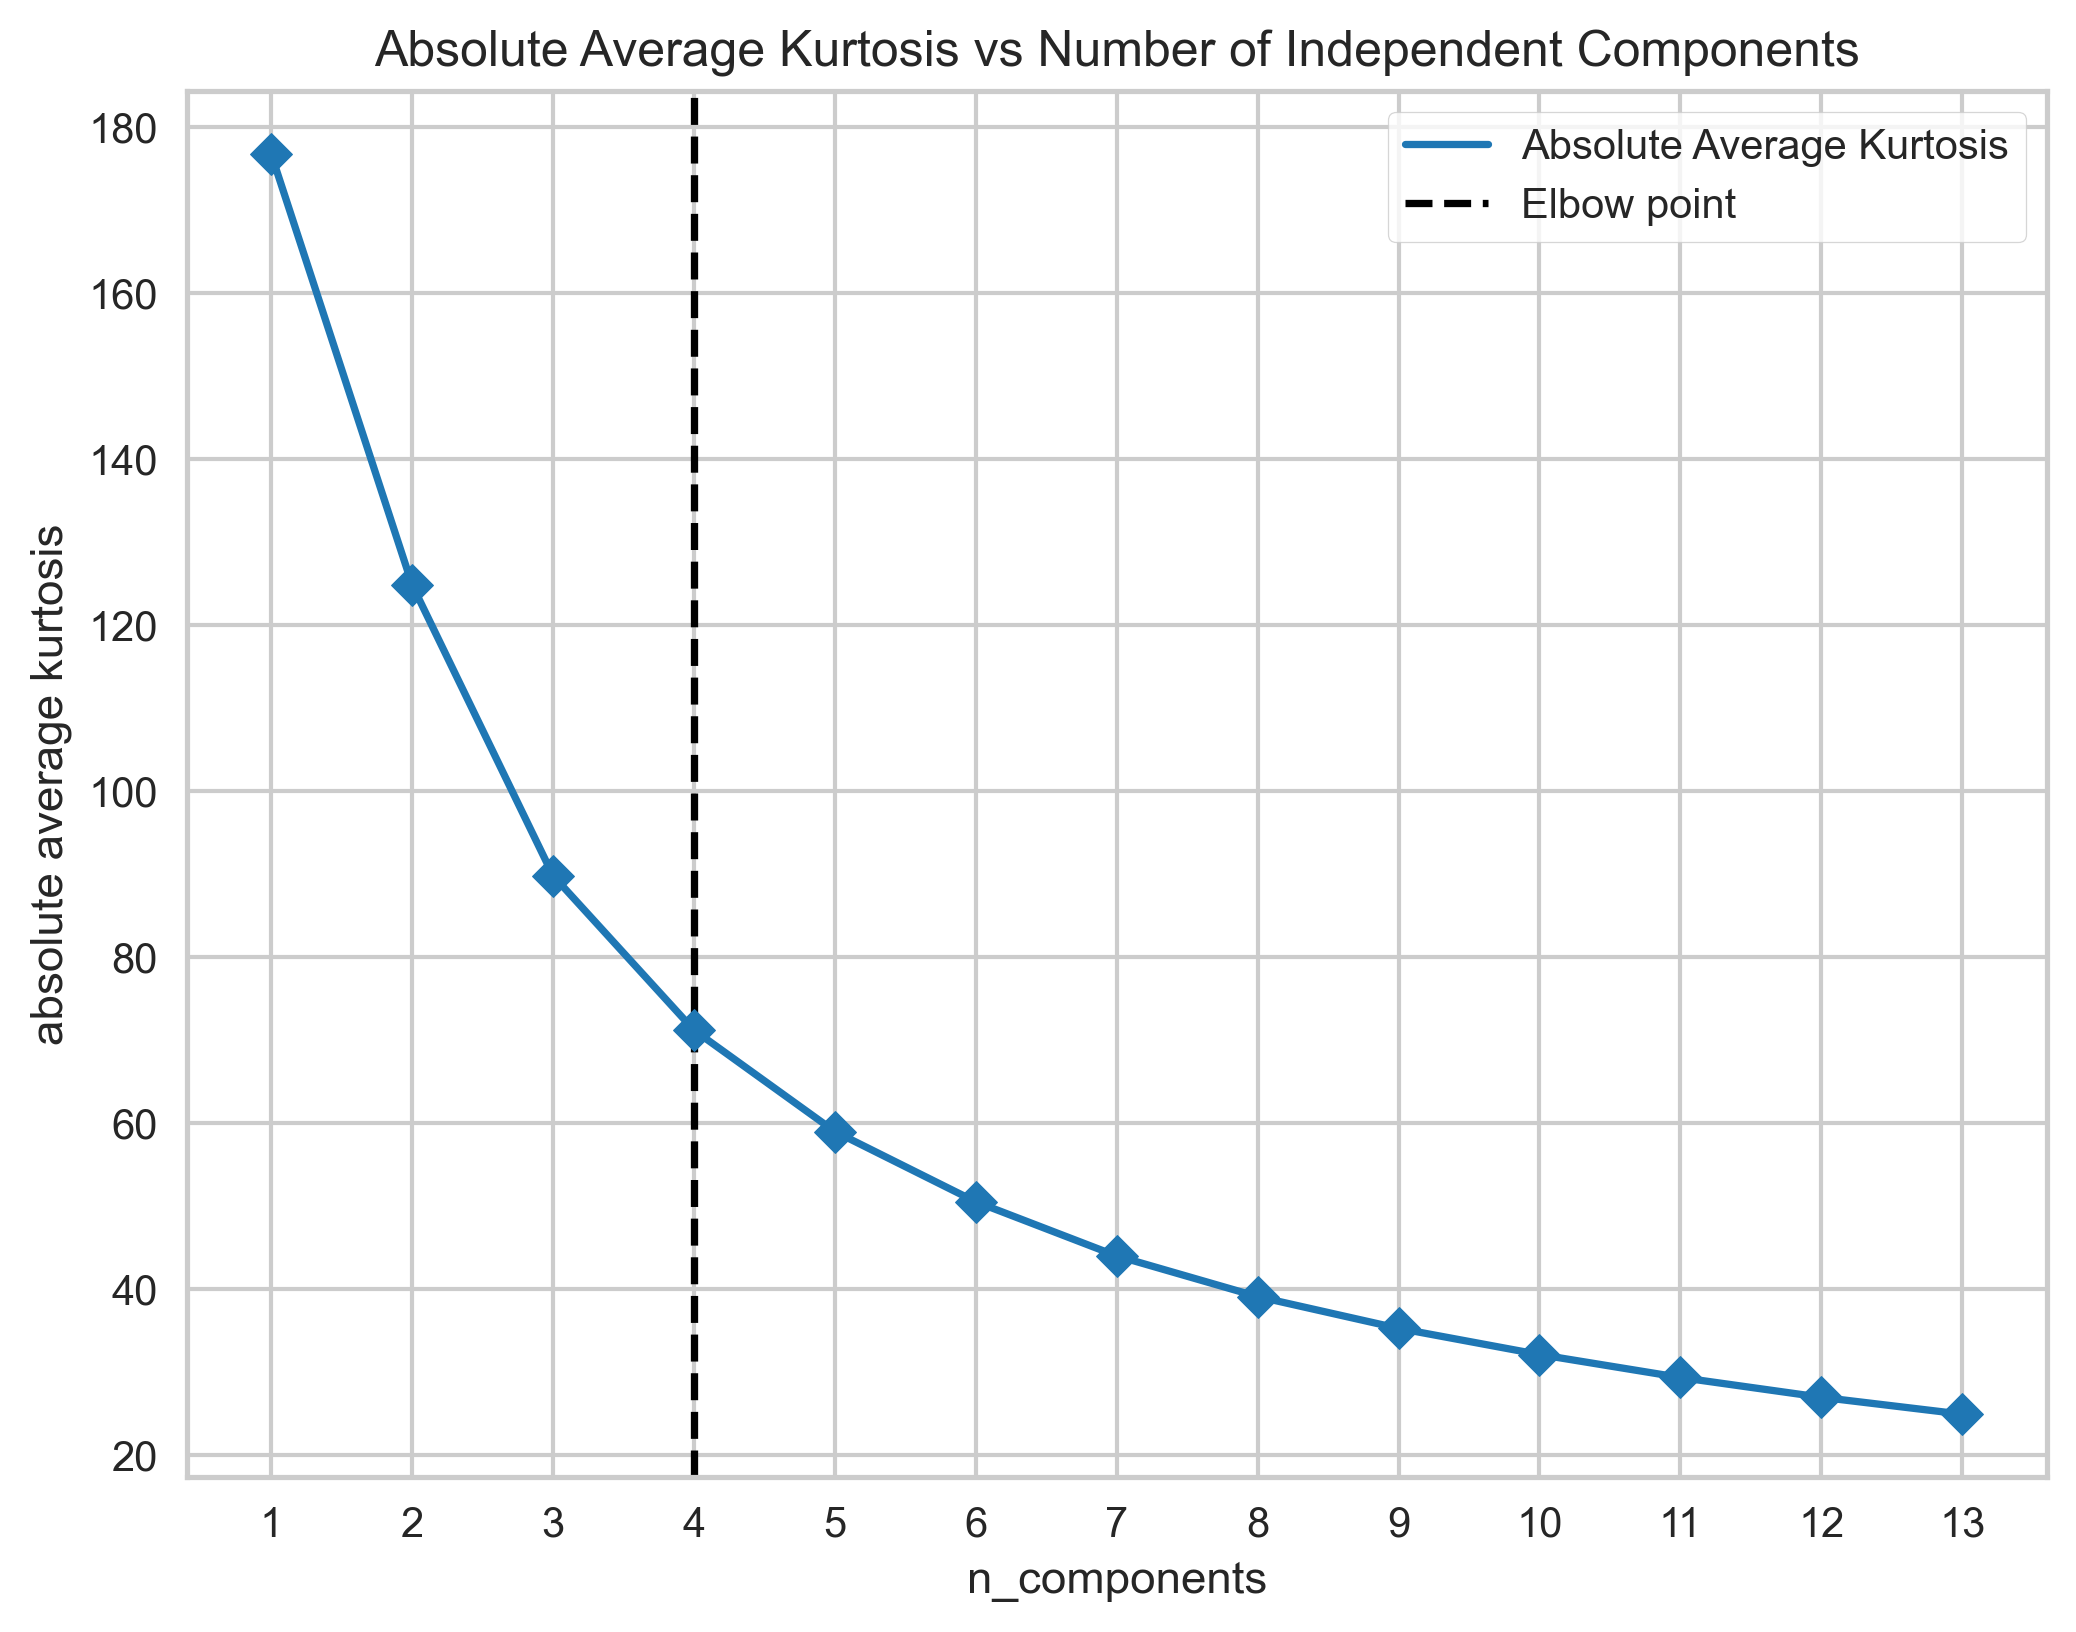

In [21]:
importlib.reload(charts)
charts.ica_visualize_absolute_mean_kurtosis(
    X_data=X_train,
    output_path=f"{STEP_2_PATH}/ica_absolute_mean_kurtosis.png",
    seed=SEED,
)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


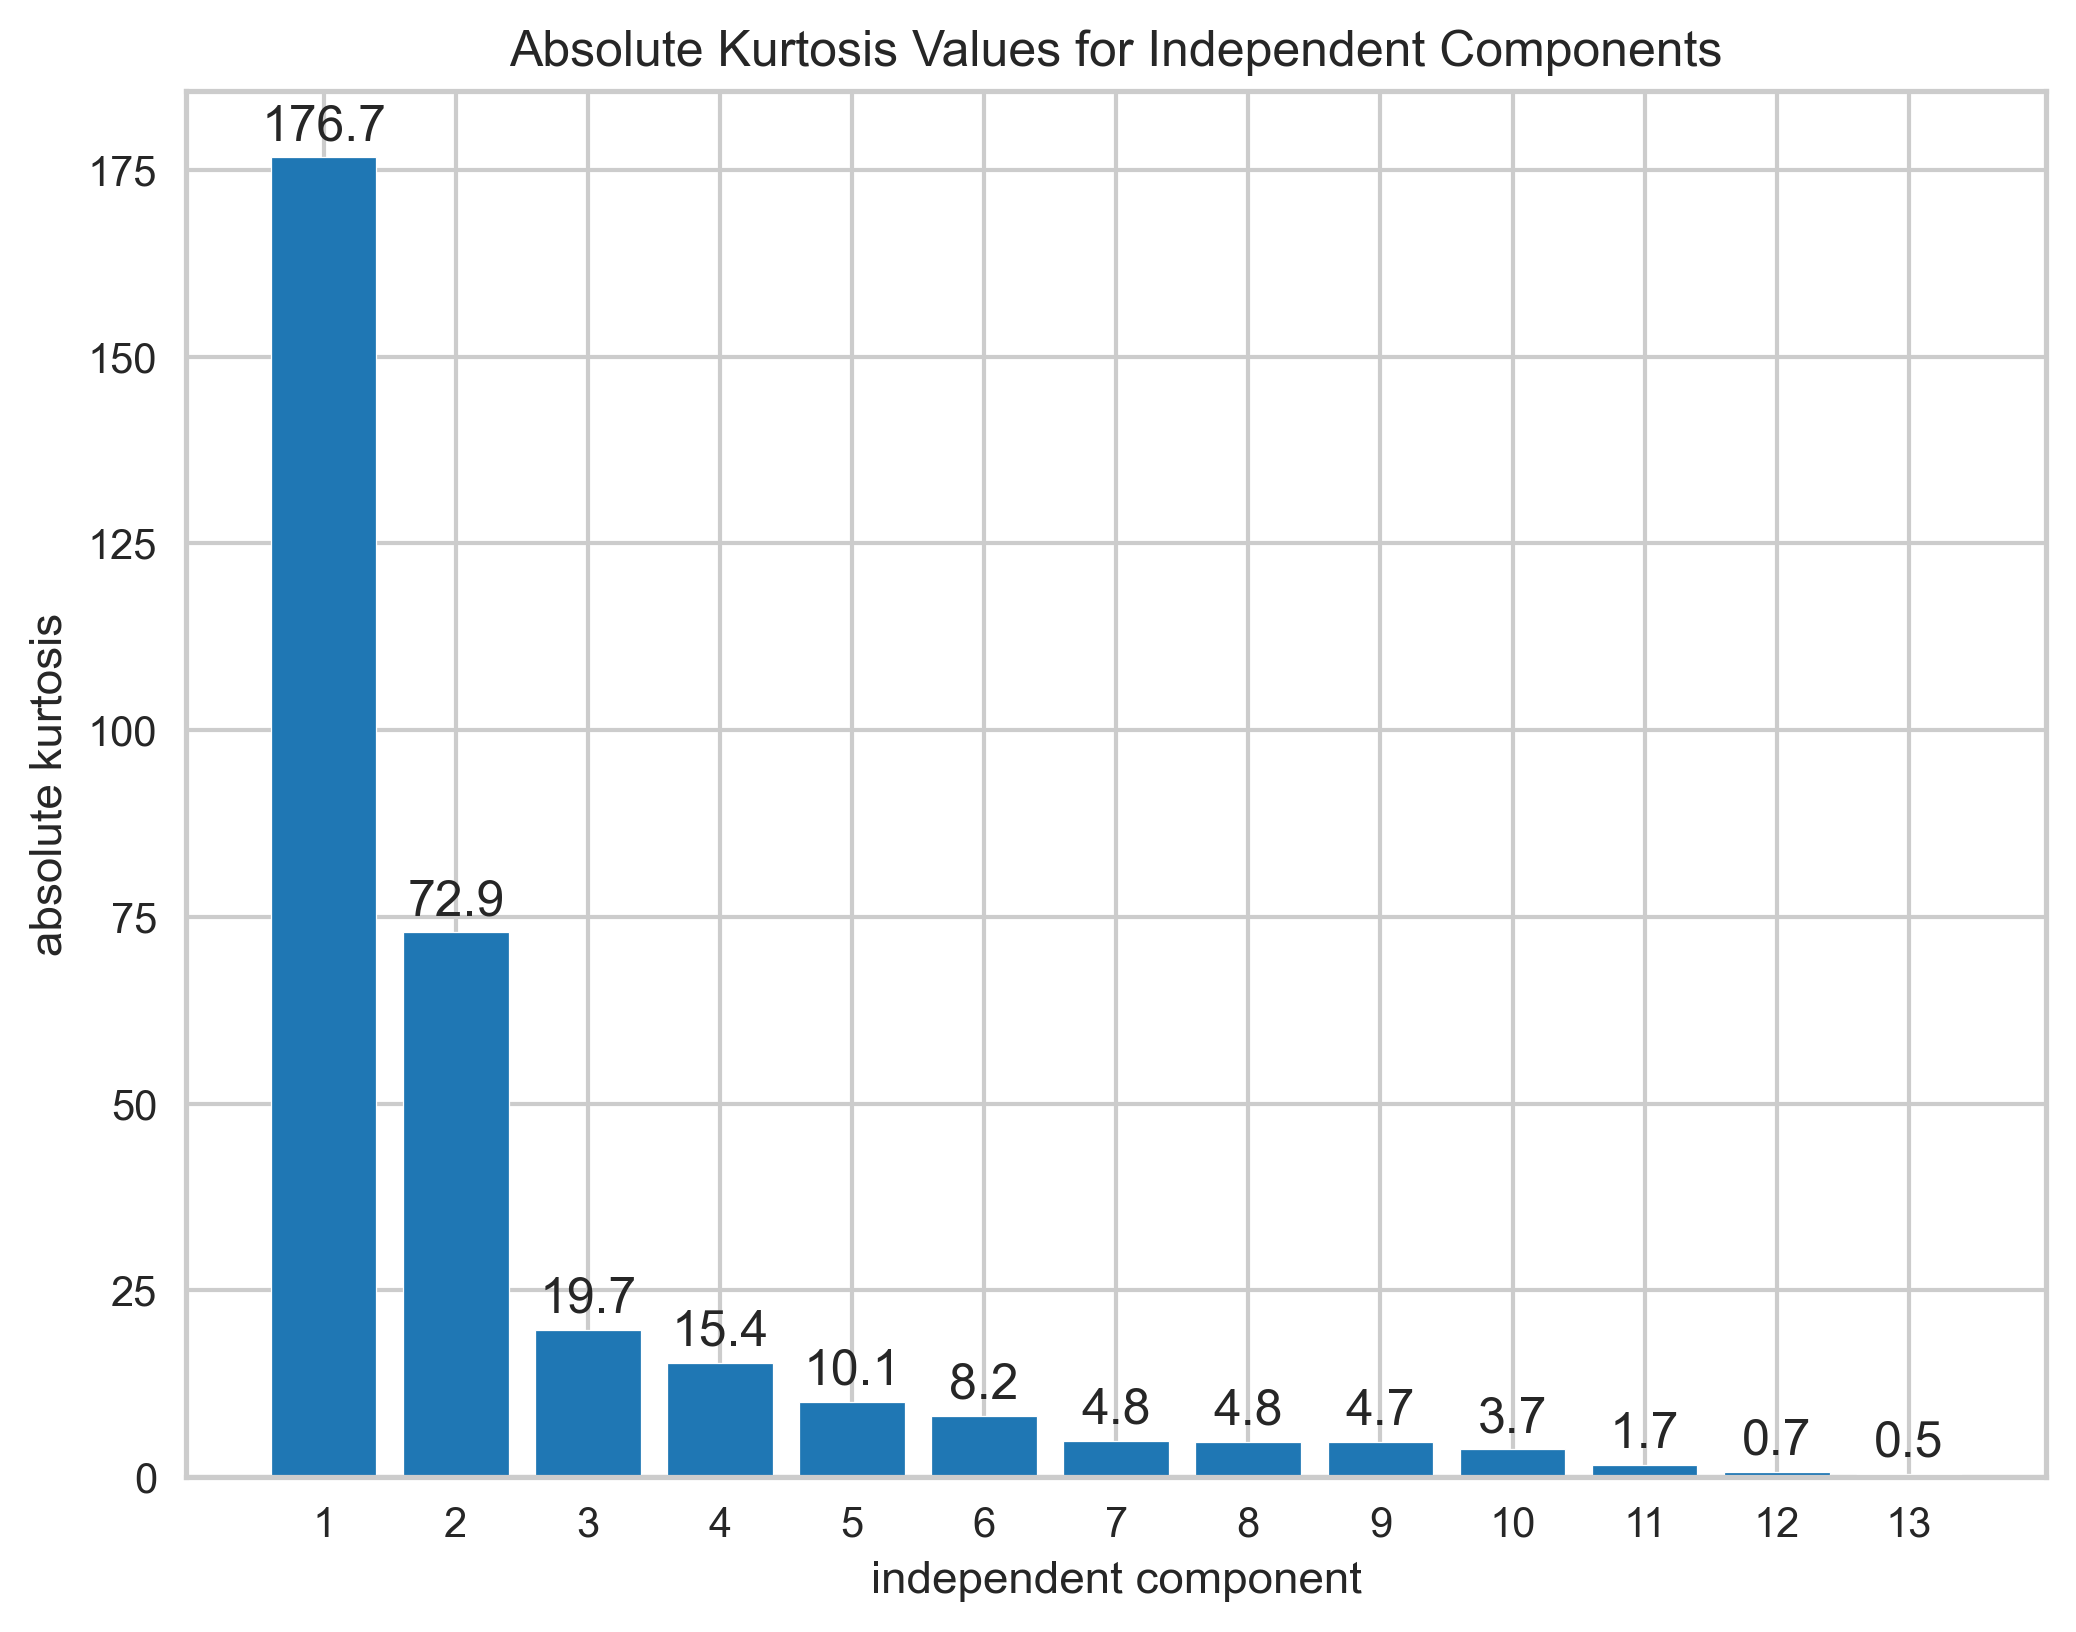

In [22]:
importlib.reload(charts)
charts.ica_visualize_absolute_kurtosis_distribution(
    X_data=X_train,
    output_path=f"{STEP_2_PATH}/ica_kurtosis_values_components.png",
    seed=SEED,

)

## RP

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


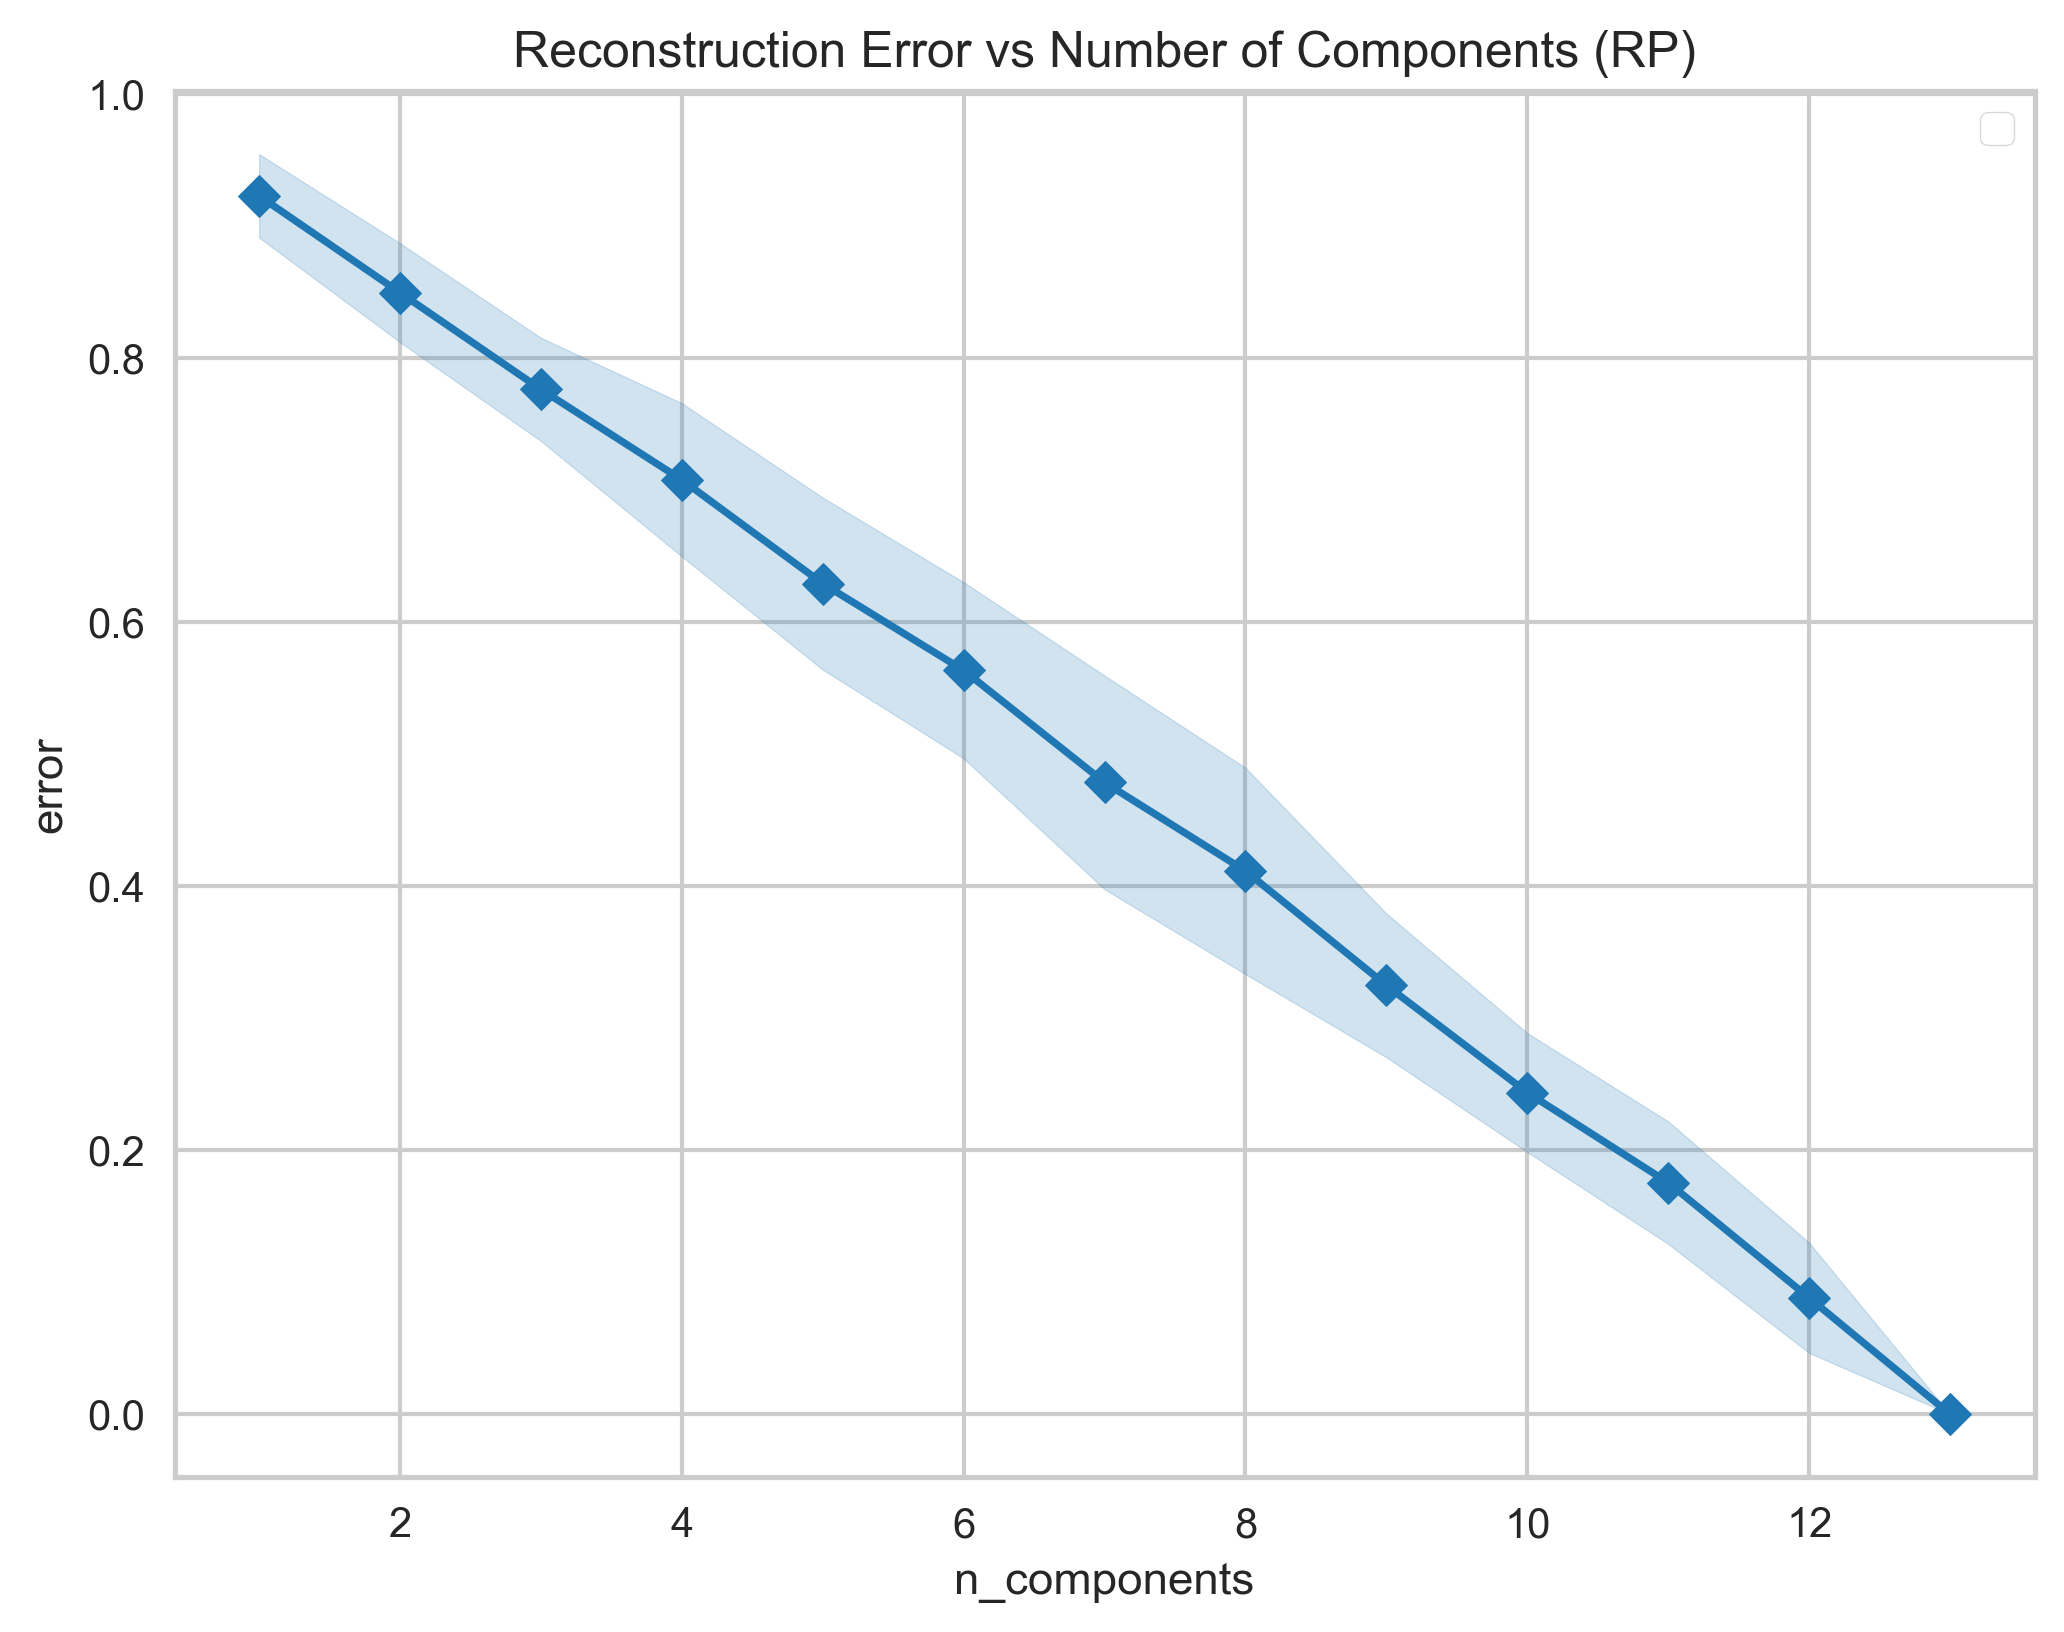

In [23]:
importlib.reload(charts)
charts.rp_reconstruction_error(
    X_data=X_train,
    output_path=f"{STEP_2_PATH}/rp_reconstruction_error.png",
)

## Isomap

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


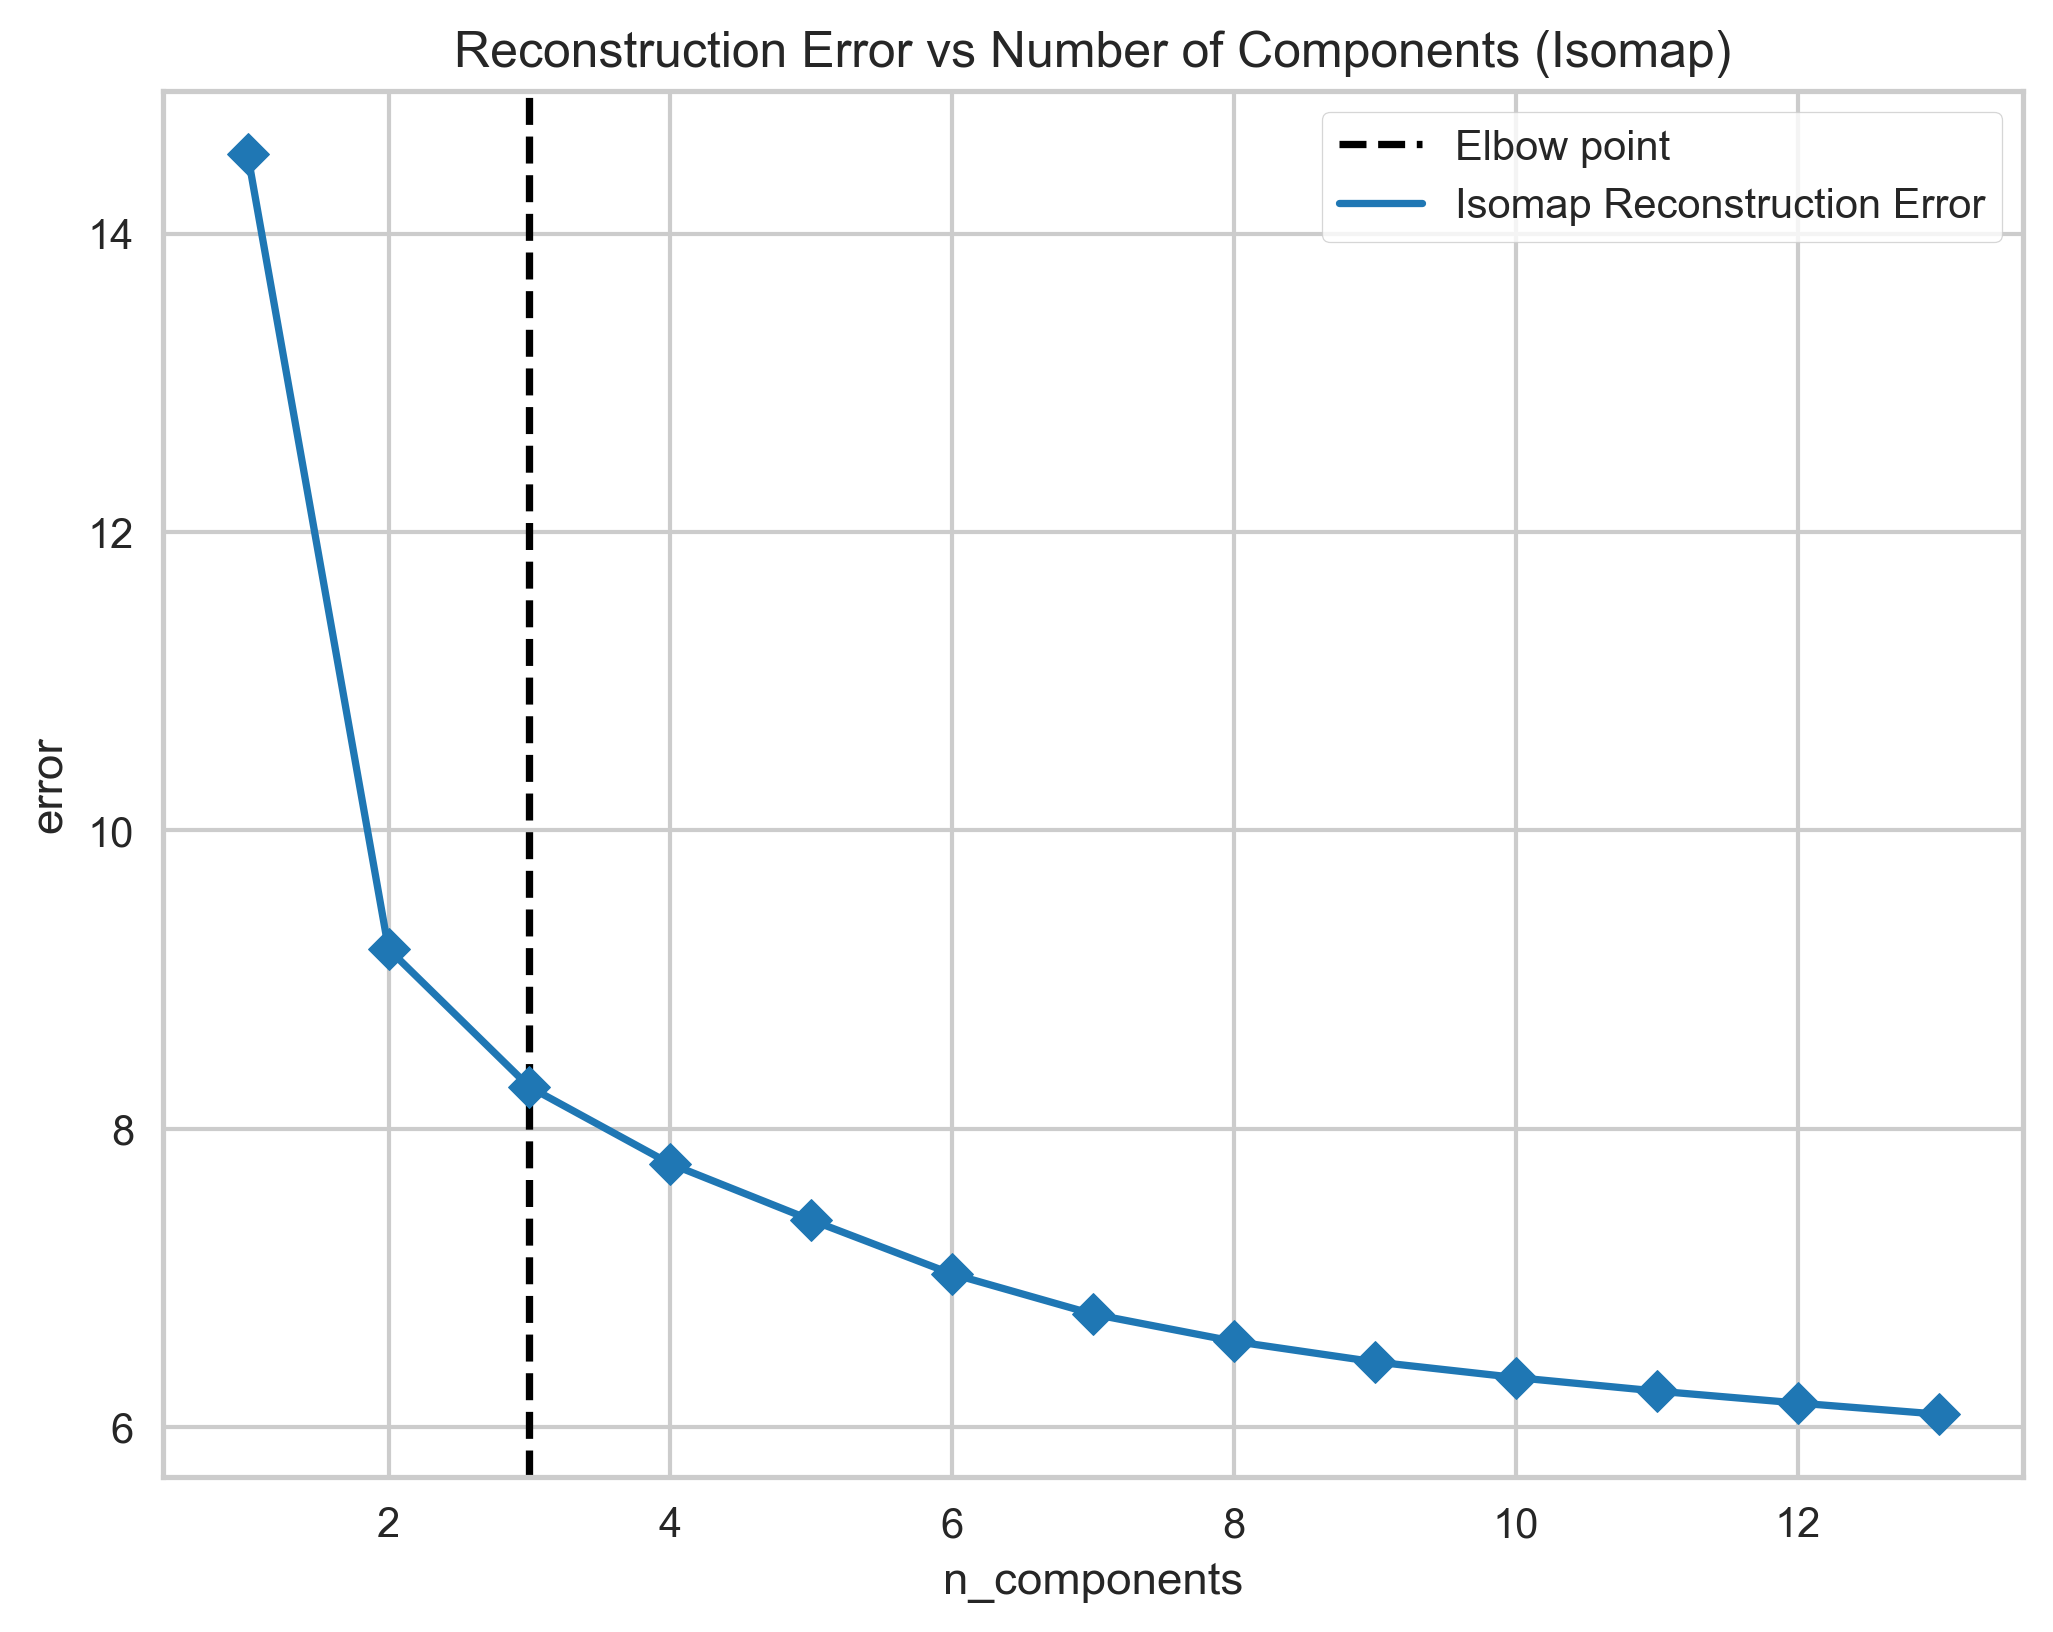

In [24]:
importlib.reload(charts)
charts.isomap_reconstruction_error(
    X_data=X_train,
    output_path=f"{STEP_2_PATH}/isomap_reconstruction_error.png",
)

## Evaluation

In [25]:
from sklearn.manifold import Isomap
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import PCA, FastICA
from DummyTransformer import DummyTransformer


def get_baseline():
    return "Baseline", DummyTransformer()


def get_best_pca():
    return "PCA(n=8)", PCA(n_components=8)


def get_best_ica():
    return "ICA(n=4)", FastICA(n_components=4, random_state=SEED)


def get_best_rp():
    return "RP(n=10)", GaussianRandomProjection(n_components=10, random_state=SEED)


def get_best_isomap():
    return "Isomap(n=3)", Isomap(n_components=3)


In [26]:
importlib.reload(evals)

projections = [
    get_best_pca(),
    get_best_ica(),
    get_best_rp(),
    get_best_isomap(),
]

all_projections = [get_baseline()] + projections
evals.evaluate_dim_reduction(
    transformers=all_projections,
    X_data=X_train,
    labels=y_train,
    scoring=F1_SCORE,
)


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


DecisionTreeClassifier  RandomForestClassifier  \
Baseline    0                0.506349                0.558977   
PCA(n=8)    0                0.487548                0.546992   
ICA(n=4)    0                0.489428                0.521381   
RP(n=10)    0                0.481437                0.537595   
Isomap(n=3) 0                0.472510                0.503292   

               BaggingClassifier  LinearSVC  SGDClassifier  LogisticRegression  
Baseline    0           0.516450   0.540181       0.487084            0.551222  
PCA(n=8)    0           0.504938   0.519502       0.460062            0.531957  
ICA(n=4)    0           0.492953   0.496004       0.428796            0.442905  
RP(n=10)    0           0.512687   0.510576       0.457940            0.514802  
Isomap(n=3) 0           0.460524   0.487545       0.394040            0.485903

# Step 3

In [27]:
projections_with_short_names = list((a, b[0], b[1]) for a, b in zip(["pca", "ica", "rp", "isomap"], projections))

In [28]:
%%capture
for projection in projections_with_short_names:
    short_name, name, transformer = projection
    X_train_transformed = transformer.fit_transform(X_train)

    charts.gmm_visualize_aic_bic(
        X_data=X_train_transformed,
        output_path=f"{STEP_3_PATH}/em_{short_name}_aic_bic.png",
        seed=SEED,
        k_max=20,
        n_init=10,
    )
    ;
    charts.k_means_visualize(
        X_data=X_train_transformed,
        output_path=f"{STEP_3_PATH}/k_means_{short_name}_distortion.png",
        seed=SEED,
        metric='distortion',
        locate_elbow=True
    )
    ;
;

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [29]:
importlib.reload(evals)


def get_best_kmeans(dim_red):
    if isinstance(dim_red, DummyTransformer):
        return "KMeans(k=7)", KMeans(random_state=SEED, n_clusters=7)
    if isinstance(dim_red, PCA):
        return "KMeans(k=6)", KMeans(random_state=SEED, n_clusters=6)
    if isinstance(dim_red, FastICA):
        return "KMeans(k=6)", KMeans(random_state=SEED, n_clusters=6)
    if isinstance(dim_red, GaussianRandomProjection):
        return "KMeans(k=7)", KMeans(random_state=SEED, n_clusters=7)
    if isinstance(dim_red, Isomap):
        return "KMeans(k=5)", KMeans(random_state=SEED, n_clusters=5)
    raise AssertionError(f'unexpected argument: {dim_red}')


def get_best_gmm(dim_red):
    if isinstance(dim_red, DummyTransformer):
        return "GMM(k=8)", GaussianMixture(random_state=SEED, n_components=8, n_init=10)
    if isinstance(dim_red, PCA):
        return "GMM(k=14)", GaussianMixture(random_state=SEED, n_components=14, n_init=10)
    if isinstance(dim_red, FastICA):
        return "GMM(k=6)", GaussianMixture(random_state=SEED, n_components=6, n_init=10)
    if isinstance(dim_red, GaussianRandomProjection):
        return "GMM(k=11)", GaussianMixture(random_state=SEED, n_components=11, n_init=10)
    if isinstance(dim_red, Isomap):
        return "GMM(k=16)", GaussianMixture(random_state=SEED, n_components=16, n_init=10)
    raise AssertionError(f'unexpected argument: {dim_red}')


def get_best_models_with_transformers():
    result = []
    for dim_red_name, dim_red in all_projections:
        k_means_name, k_means_model = get_best_kmeans(dim_red)
        k_means_element = (f"{dim_red_name}, {k_means_name}", dim_red, k_means_model)

        gmm_name, gmm_model = get_best_gmm(dim_red)
        gmm_element = (f"{dim_red_name}, {gmm_name}", dim_red, gmm_model)

        result.append(k_means_element)
        result.append(gmm_element)
    return result


models_with_transformers = get_best_models_with_transformers()



In [30]:
evals.evaluate_models_with_transformers(
    models=models_with_transformers,
    X_data=X_train,
    labels=y_train
)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Rand Index  V Measure  Mutual Information  \
Baseline, KMeans(k=7)    0    0.625605   0.060003            0.092530   
Baseline, GMM(k=8)       0    0.625141   0.063513            0.099790   
PCA(n=8), KMeans(k=6)    0    0.624920   0.058616            0.089494   
PCA(n=8), GMM(k=14)      0    0.648528   0.076618            0.141065   
ICA(n=4), KMeans(k=6)    0    0.622931   0.054893            0.083122   
ICA(n=4), GMM(k=6)       0    0.600619   0.064965            0.090873   
RP(n=10), KMeans(k=7)    0    0.619950   0.037473            0.057457   
RP(n=10), GMM(k=11)      0    0.641412   0.065700            0.114524   
Isomap(n=3), KMeans(k=5) 0    0.606713   0.055065            0.077880   
Isomap(n=3), GMM(k=16)   0    0.646967   0.062183            0.118968   

                            Fowlkes-Mallows index  
Baseline, KMeans(k=7)    0               0.262941  
Baseline, GMM(k=8)       0               0.269107  
PCA(n=8), KMeans(k=6)    0               0.264790  
PCA(n=8), GMM(k=14)      0               0.217982  
ICA(n=4), KMeans(k=6)    0               0.272564  
ICA(n=4), GMM(k=6)       0               0.315907  
RP(n=10), KMeans(k=7)    0               0.253969  
RP(n=10), GMM(k=11)      0               0.229263  
Isomap(n=3), KMeans(k=5) 0               0.291924  
Isomap(n=3), GMM(k=16)   0               0.192314

In [31]:
kmeans_baseline_clusters = get_best_kmeans(DummyTransformer())[1].fit_predict(X_train)
gmm_baseline_clusters = get_best_gmm(DummyTransformer())[1].fit_predict(X_train)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [32]:
# How new clusters are similar baseline KMeans
evals.evaluate_models_with_transformers(
    models=models_with_transformers,
    X_data=X_train,
    labels=kmeans_baseline_clusters
)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Rand Index  V Measure  Mutual Information  \
Baseline, KMeans(k=7)    0    1.000000   1.000000            1.798841   
Baseline, GMM(k=8)       0    0.819920   0.497589            0.909548   
PCA(n=8), KMeans(k=6)    0    0.962991   0.872985            1.557010   
PCA(n=8), GMM(k=14)      0    0.835283   0.482477            1.012181   
ICA(n=4), KMeans(k=6)    0    0.863213   0.591868            1.048204   
ICA(n=4), GMM(k=6)       0    0.811790   0.575257            0.952362   
RP(n=10), KMeans(k=7)    0    0.853486   0.549209            0.983111   
RP(n=10), GMM(k=11)      0    0.820491   0.462419            0.924782   
Isomap(n=3), KMeans(k=5) 0    0.866113   0.653981            1.092855   
Isomap(n=3), GMM(k=16)   0    0.841055   0.547742            1.188563   

                            Fowlkes-Mallows index  
Baseline, KMeans(k=7)    0               1.000000  
Baseline, GMM(k=8)       0               0.482837  
PCA(n=8), KMeans(k=6)    0               0.892830  
PCA(n=8), GMM(k=14)      0               0.415456  
ICA(n=4), KMeans(k=6)    0               0.614245  
ICA(n=4), GMM(k=6)       0               0.568441  
RP(n=10), KMeans(k=7)    0               0.575282  
RP(n=10), GMM(k=11)      0               0.395703  
Isomap(n=3), KMeans(k=5) 0               0.667056  
Isomap(n=3), GMM(k=16)   0               0.416444

In [33]:
evals.evaluate_models_with_transformers(
    models=models_with_transformers,
    X_data=X_train,
    labels=gmm_baseline_clusters,
)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Rand Index  V Measure  Mutual Information  \
Baseline, KMeans(k=7)    0    0.819920   0.497589            0.909548   
Baseline, GMM(k=8)       0    1.000000   1.000000            1.856983   
PCA(n=8), KMeans(k=6)    0    0.818376   0.490265            0.888663   
PCA(n=8), GMM(k=14)      0    0.864131   0.592572            1.260375   
ICA(n=4), KMeans(k=6)    0    0.823870   0.465620            0.838153   
ICA(n=4), GMM(k=6)       0    0.831218   0.581314            0.979290   
RP(n=10), KMeans(k=7)    0    0.810496   0.439425            0.799368   
RP(n=10), GMM(k=11)      0    0.864667   0.585184            1.187310   
Isomap(n=3), KMeans(k=5) 0    0.810598   0.535889            0.911091   
Isomap(n=3), GMM(k=16)   0    0.832913   0.485834            1.068351   

                            Fowlkes-Mallows index  
Baseline, KMeans(k=7)    0               0.482837  
Baseline, GMM(k=8)       0               1.000000  
PCA(n=8), KMeans(k=6)    0               0.482020  
PCA(n=8), GMM(k=14)      0               0.534948  
ICA(n=4), KMeans(k=6)    0               0.510368  
ICA(n=4), GMM(k=6)       0               0.618248  
RP(n=10), KMeans(k=7)    0               0.459085  
RP(n=10), GMM(k=11)      0               0.557621  
Isomap(n=3), KMeans(k=5) 0               0.530773  
Isomap(n=3), GMM(k=16)   0               0.399215

In [34]:
# Let's look at GMM Isomap, because we got soooo many clusters
# Let's look at ICA KMeans, because it is the only KMeans combination that generated more clusters than the baseline.
# If we really-really need some other stuff, then let's plot silhouette scores for KMeans algo, t-SNE/Isomap visualization, etc.

# Step 4

## Isomap

In [35]:
import training as training
import metrics as metrics
import mlp_visualizations as mlp_viz
from sklearn.neural_network import MLPClassifier


In [36]:
isomap = get_best_isomap()[1]
X_train_isomap = isomap.fit_transform(X_train)
X_test_isomap = isomap.transform(X_test)

best_mlp_params_isomap = training.perform_hyperparameter_tuning(
    clf=MLPClassifier(random_state=SEED, hidden_layer_sizes=[30] * 2, max_iter=1000, tol=1e-5),
    X_tr=X_train_isomap,
    y_tr=y_train,
    cv=CV,
    param_space={
        "alpha": np.logspace(-5, -2, 4),
        "learning_rate_init": np.logspace(-3, -1, 4),
        "batch_size": [16, 32, 64]
    },
    n_jobs=-1,
    scoring=F1_SCORE,
)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/pavponn/opt/anaconda3/envs/assignment-3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/pavponn/opt/anaconda3/envs/assignment-3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/pavponn/opt/anaconda3/envs/assignment-3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/pavponn/opt/anaconda3/envs/assignment-3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be 

In [37]:
best_mlp_params_isomap

{'alpha': 0.0001, 'batch_size': 16, 'learning_rate_init': 0.001}

In [38]:
def instantiate_best_mlp_clf_isomap(max_iter=1000):
    return MLPClassifier(random_state=SEED,
                         hidden_layer_sizes=[30] * 2,
                         max_iter=max_iter,
                         tol=1e-5,
                         batch_size=best_mlp_params_isomap['batch_size'],
                         alpha=best_mlp_params_isomap['alpha'],
                         learning_rate_init=best_mlp_params_isomap['learning_rate_init'])


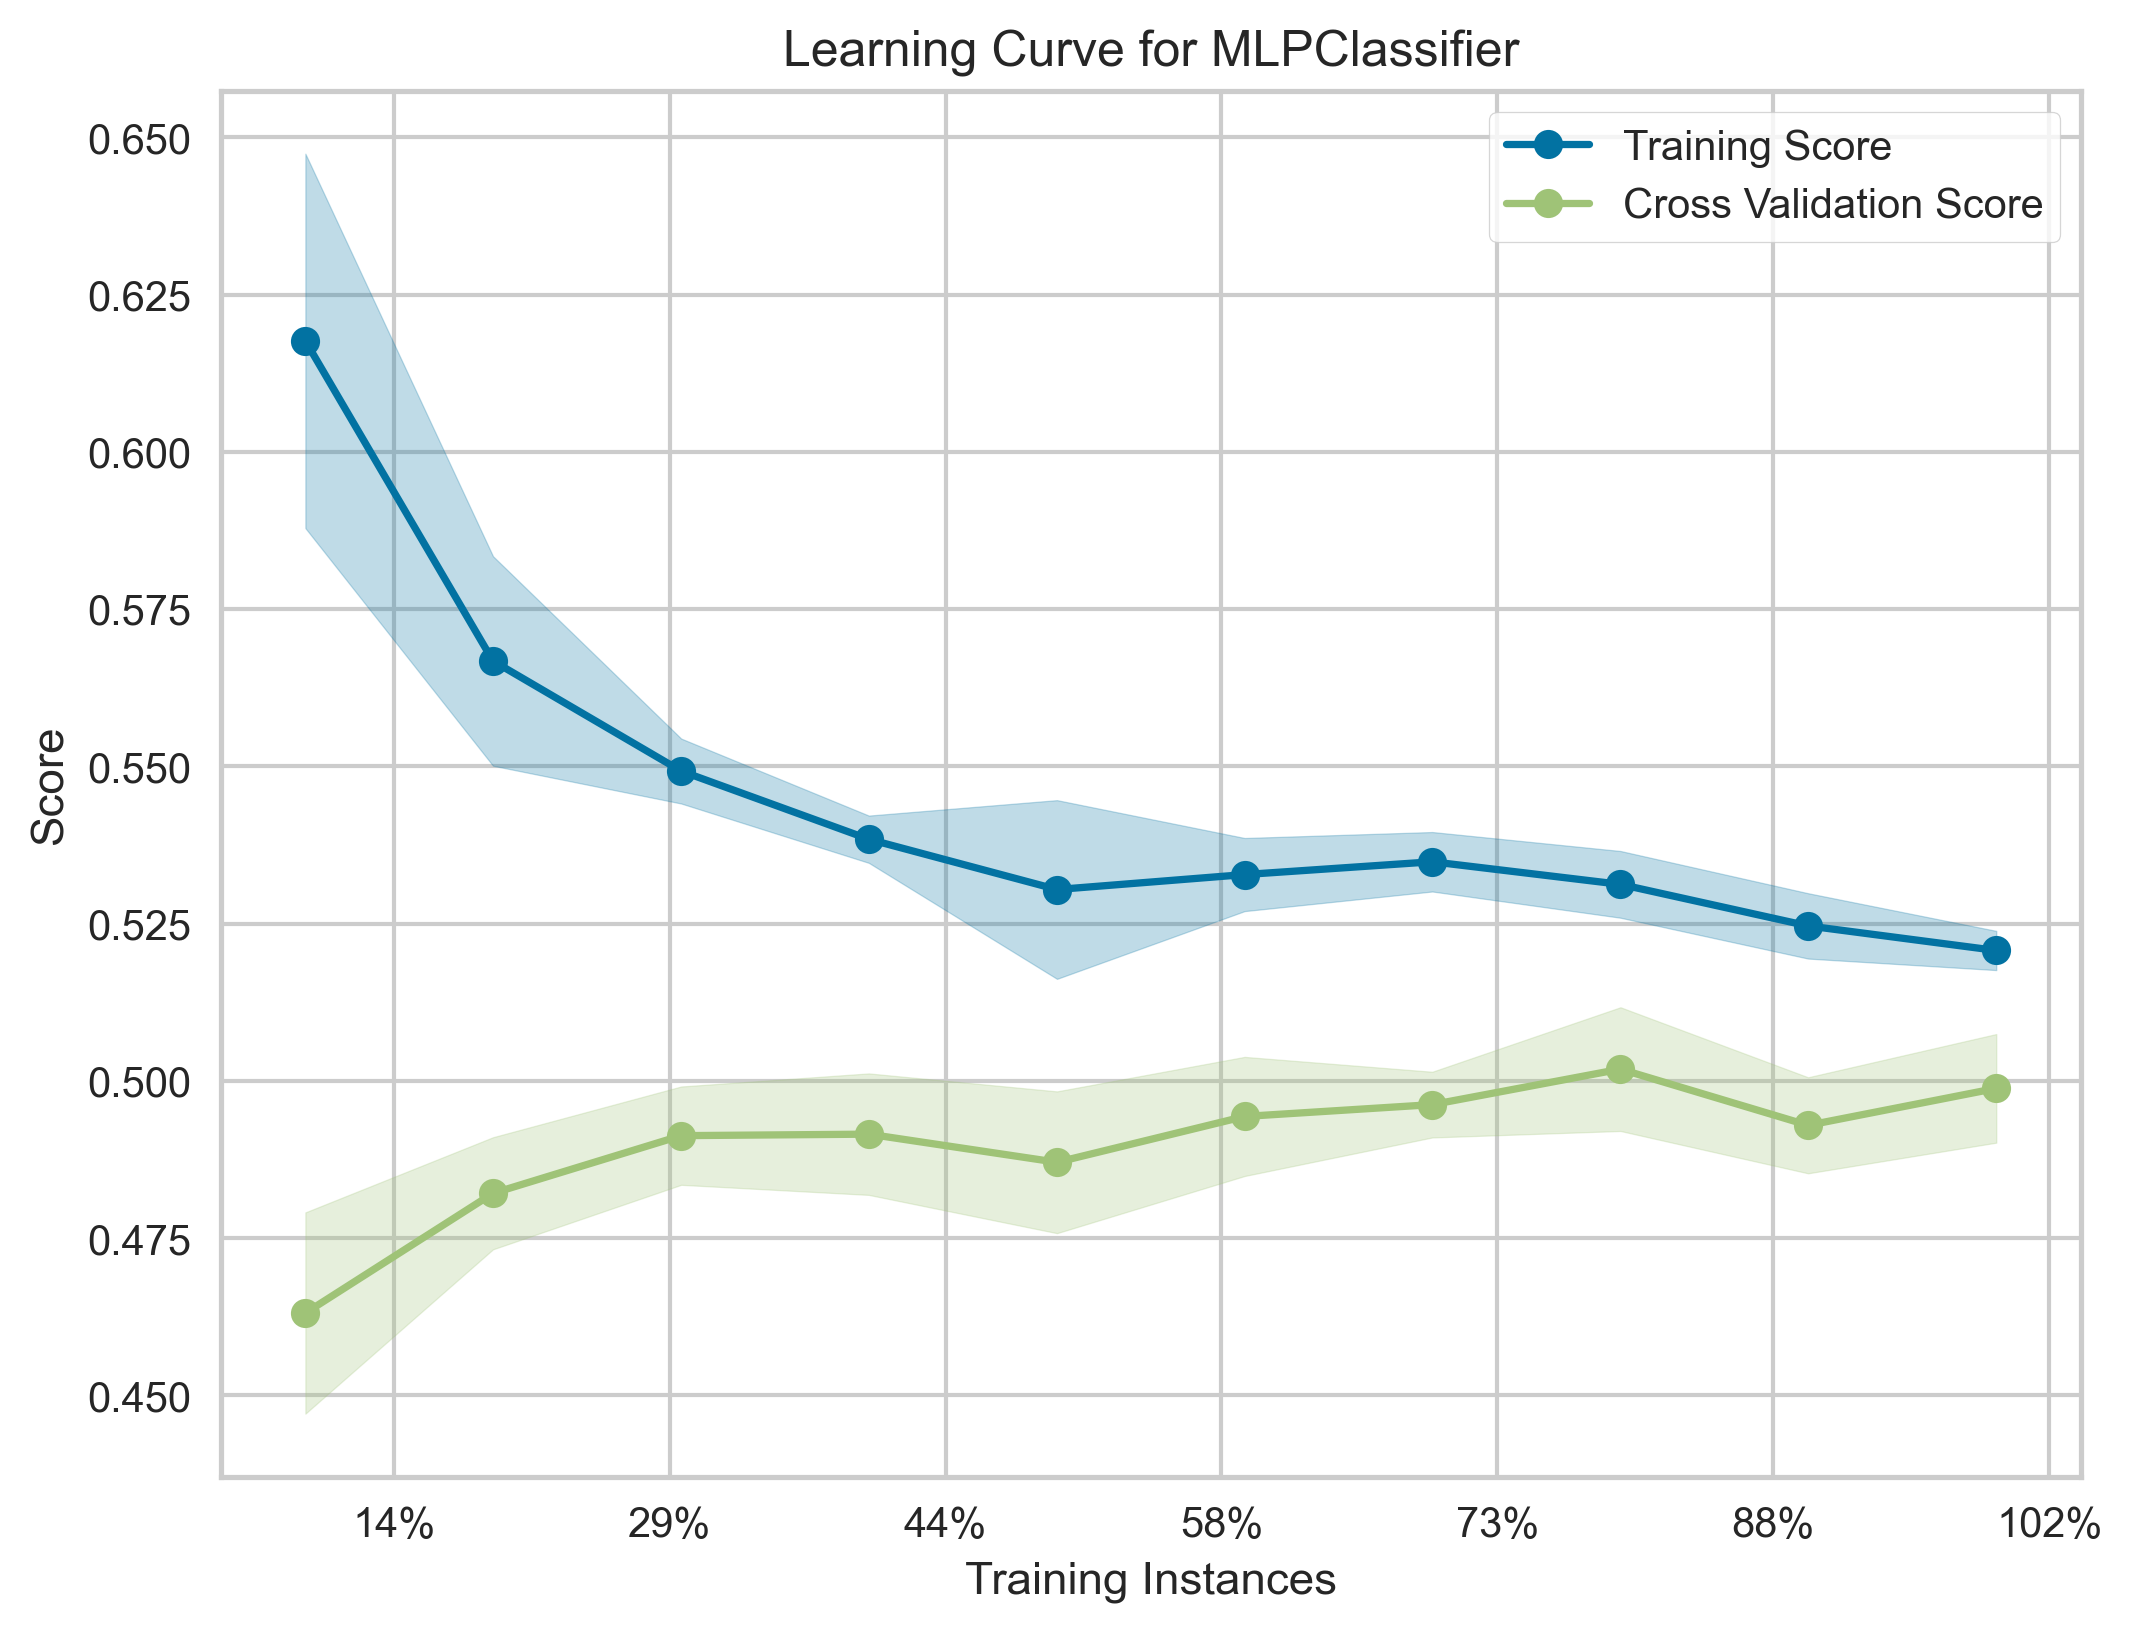

In [39]:
best_mlp_clf_isomap = instantiate_best_mlp_clf_isomap()
mlp_viz.learning_curve(clf=best_mlp_clf_isomap,
                       X_tr=X_train_isomap,
                       y_tr=y_train,
                       cv=CV, output_path=f"{STEP_4_PATH}/isomap_mlp_learning_curve.png",
                       scoring=F1_SCORE)

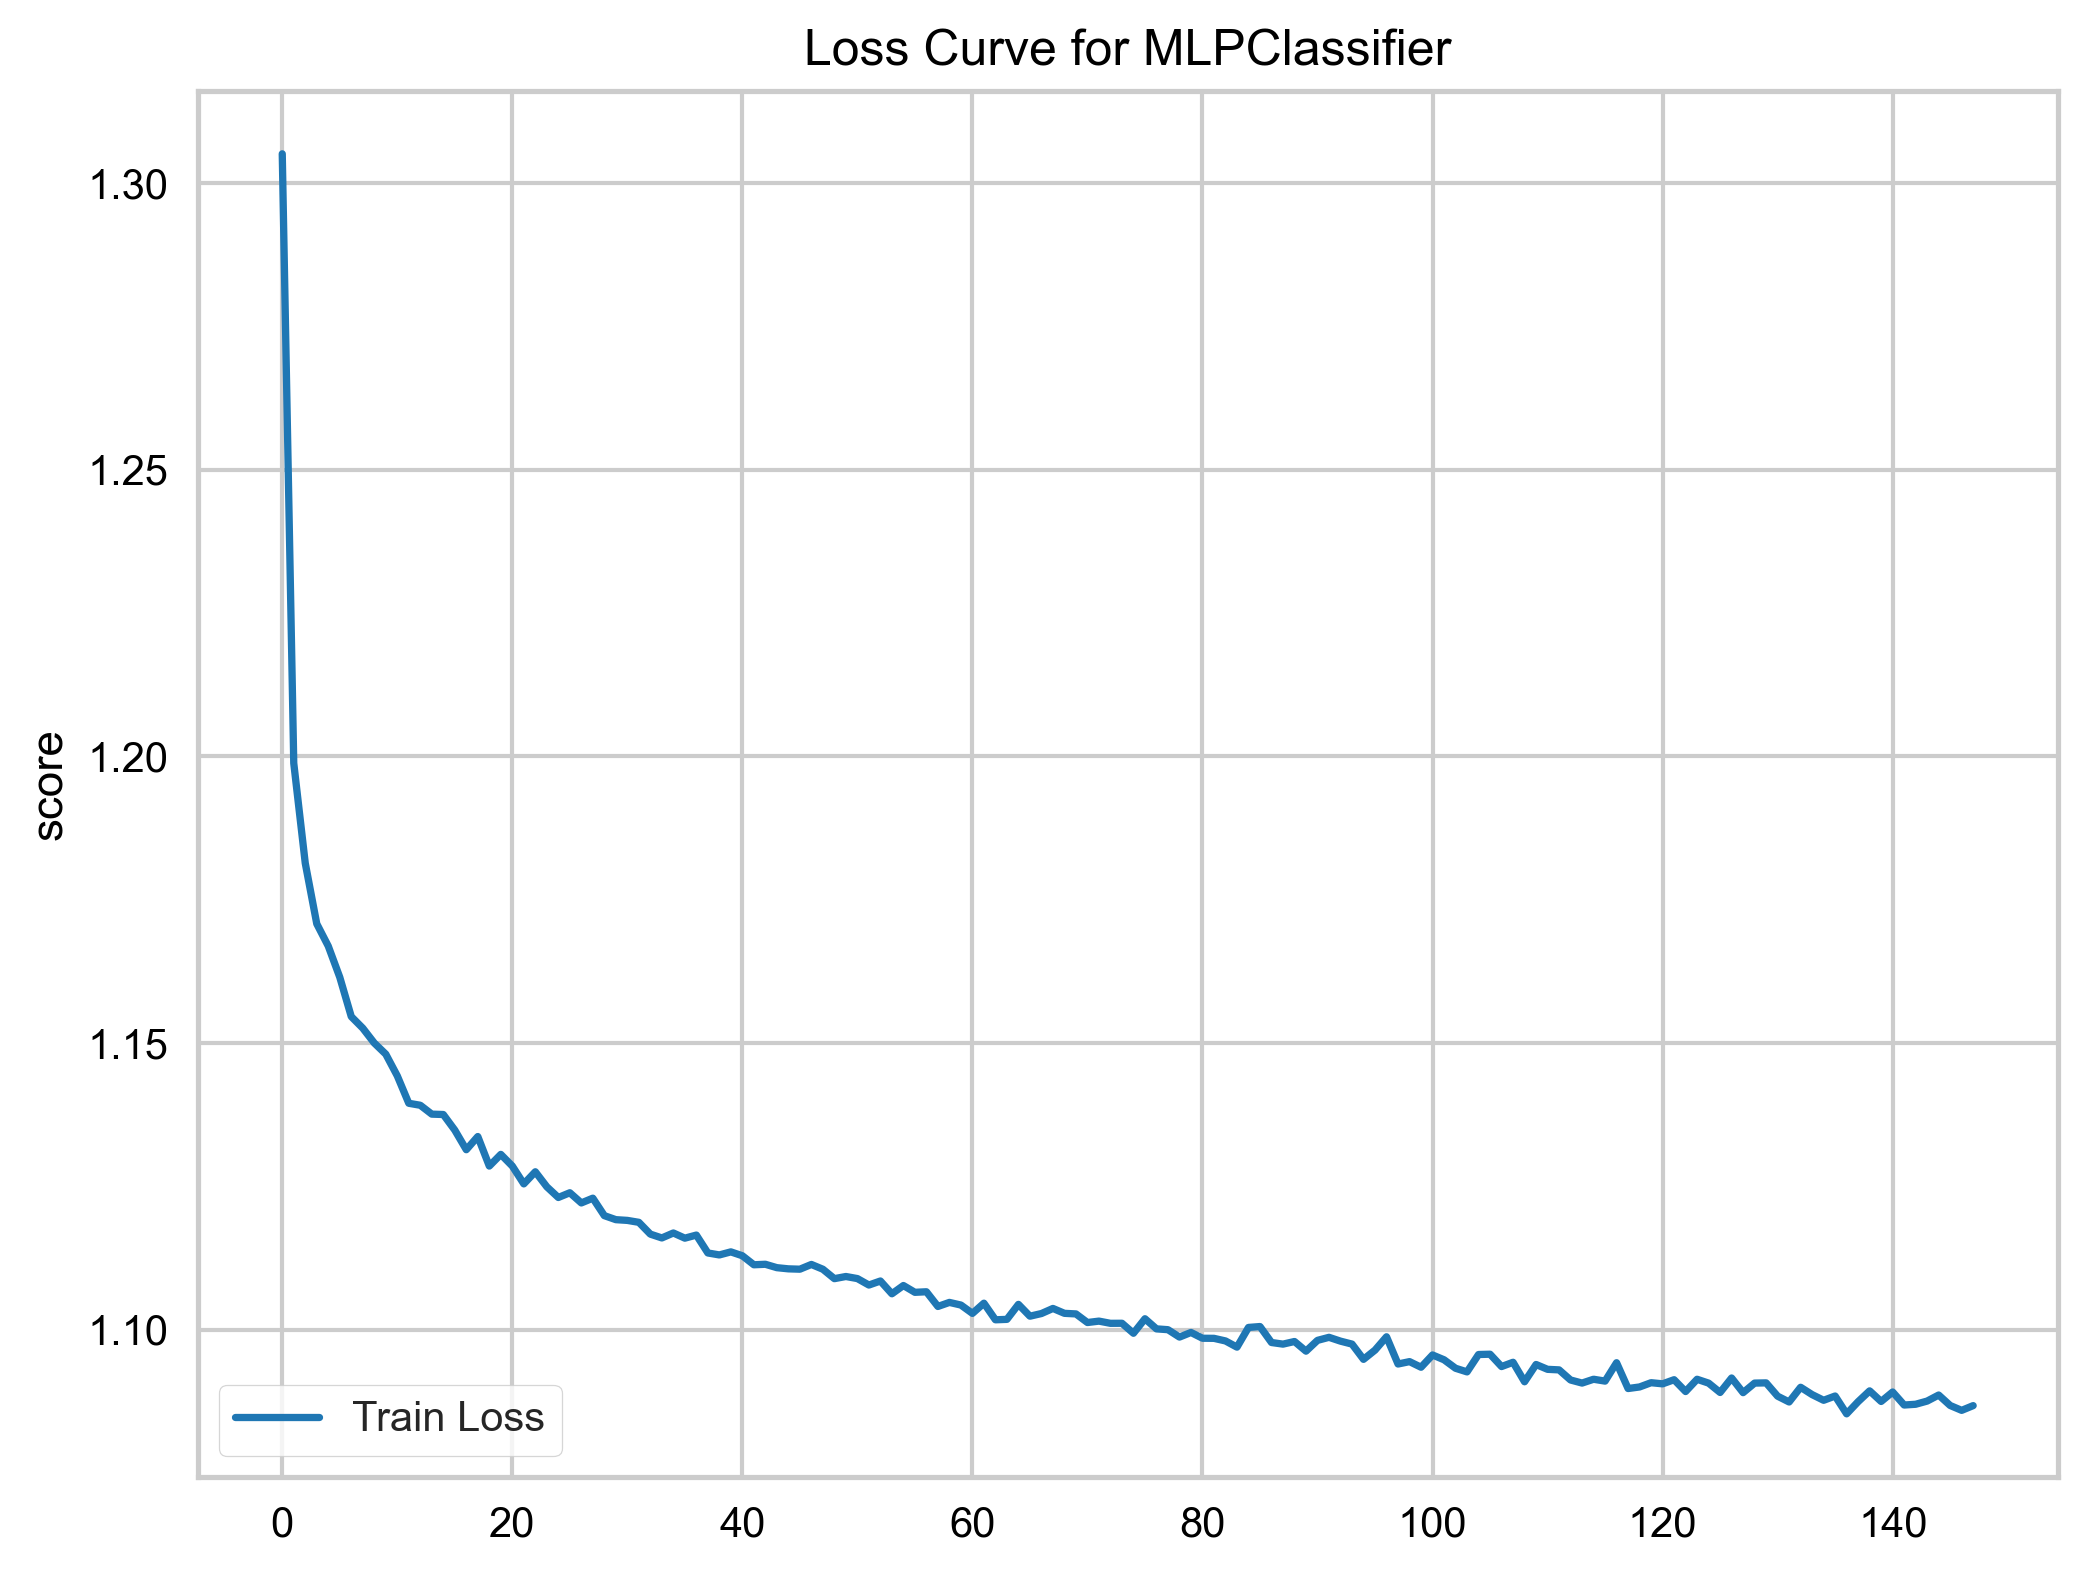

In [40]:
best_mlp_clf_isomap = instantiate_best_mlp_clf_isomap()
best_mlp_clf_isomap.fit(X_train_isomap, y_train)

mlp_viz.loss_curve(best_mlp_clf_isomap, output_path=f"{STEP_4_PATH}/isomap_loss_curves.png")

In [41]:
metrics.f1_score_stats(clf=best_mlp_clf_isomap, X_tr=X_train_isomap, X_t=X_test_isomap, y_tr=y_train, y_t=y_test,
                       averaging=F1_AVERAGING)

F1-Score, micro (train): 0.5122
F1-Score, micro (test) : 0.4981


In [42]:
best_mlp_clf = instantiate_best_mlp_clf_isomap()
training.learning_time_stats(best_mlp_clf, X_tr=X_train_isomap, y_tr=y_train)

Training time, total: 8.7700 seconds
Training time, normalized (per 1000 samples): 2.0606 seconds


In [45]:
training.inference_time_stats(best_mlp_clf, X_train_isomap, proba=False, dataset_name='train')
training.inference_time_stats(best_mlp_clf, X_test_isomap, proba=False, dataset_name='test')
training.inference_time_stats(best_mlp_clf, np.concatenate([X_train_isomap, X_test_isomap], axis=0), proba=False,
                              dataset_name='all')

Inference time (train), total: 0.0022 seconds
Inference time (train), normalized (per 1000 samples): 0.0005 seconds
Inference time (test), total: 0.0007 seconds
Inference time (test), normalized (per 1000 samples): 0.0007 seconds
Inference time (all), total: 0.0014 seconds
Inference time (all), normalized (per 1000 samples): 0.0003 seconds


## PCA

In [46]:
pca = get_best_pca()[1]
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

best_mlp_params_pca = training.perform_hyperparameter_tuning(
    clf=MLPClassifier(random_state=SEED, hidden_layer_sizes=[30] * 2, max_iter=1000, tol=1e-5),
    X_tr=X_train_pca,
    y_tr=y_train,
    cv=CV,
    param_space={
        "alpha": np.logspace(-5, -2, 4),
        "learning_rate_init": np.logspace(-3, -1, 4),
        "batch_size": [16, 32, 64]
    },
    n_jobs=-1,
    scoring=F1_SCORE,
)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/pavponn/opt/anaconda3/envs/assignment-3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/pavponn/opt/anaconda3/envs/assignment-3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/pavponn/opt/anaconda3/envs/assignment-3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/pavponn/opt/anaconda3/envs/assignment-3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be 

In [47]:
best_mlp_params_pca

{'alpha': 0.01, 'batch_size': 32, 'learning_rate_init': 0.021544346900318832}

In [48]:
def instantiate_best_mlp_clf_pca(max_iter=1000):
    return MLPClassifier(random_state=SEED,
                         hidden_layer_sizes=[30] * 2,
                         max_iter=max_iter,
                         tol=1e-5,
                         batch_size=best_mlp_params_pca['batch_size'],
                         alpha=best_mlp_params_pca['alpha'],
                         learning_rate_init=best_mlp_params_pca['learning_rate_init'])


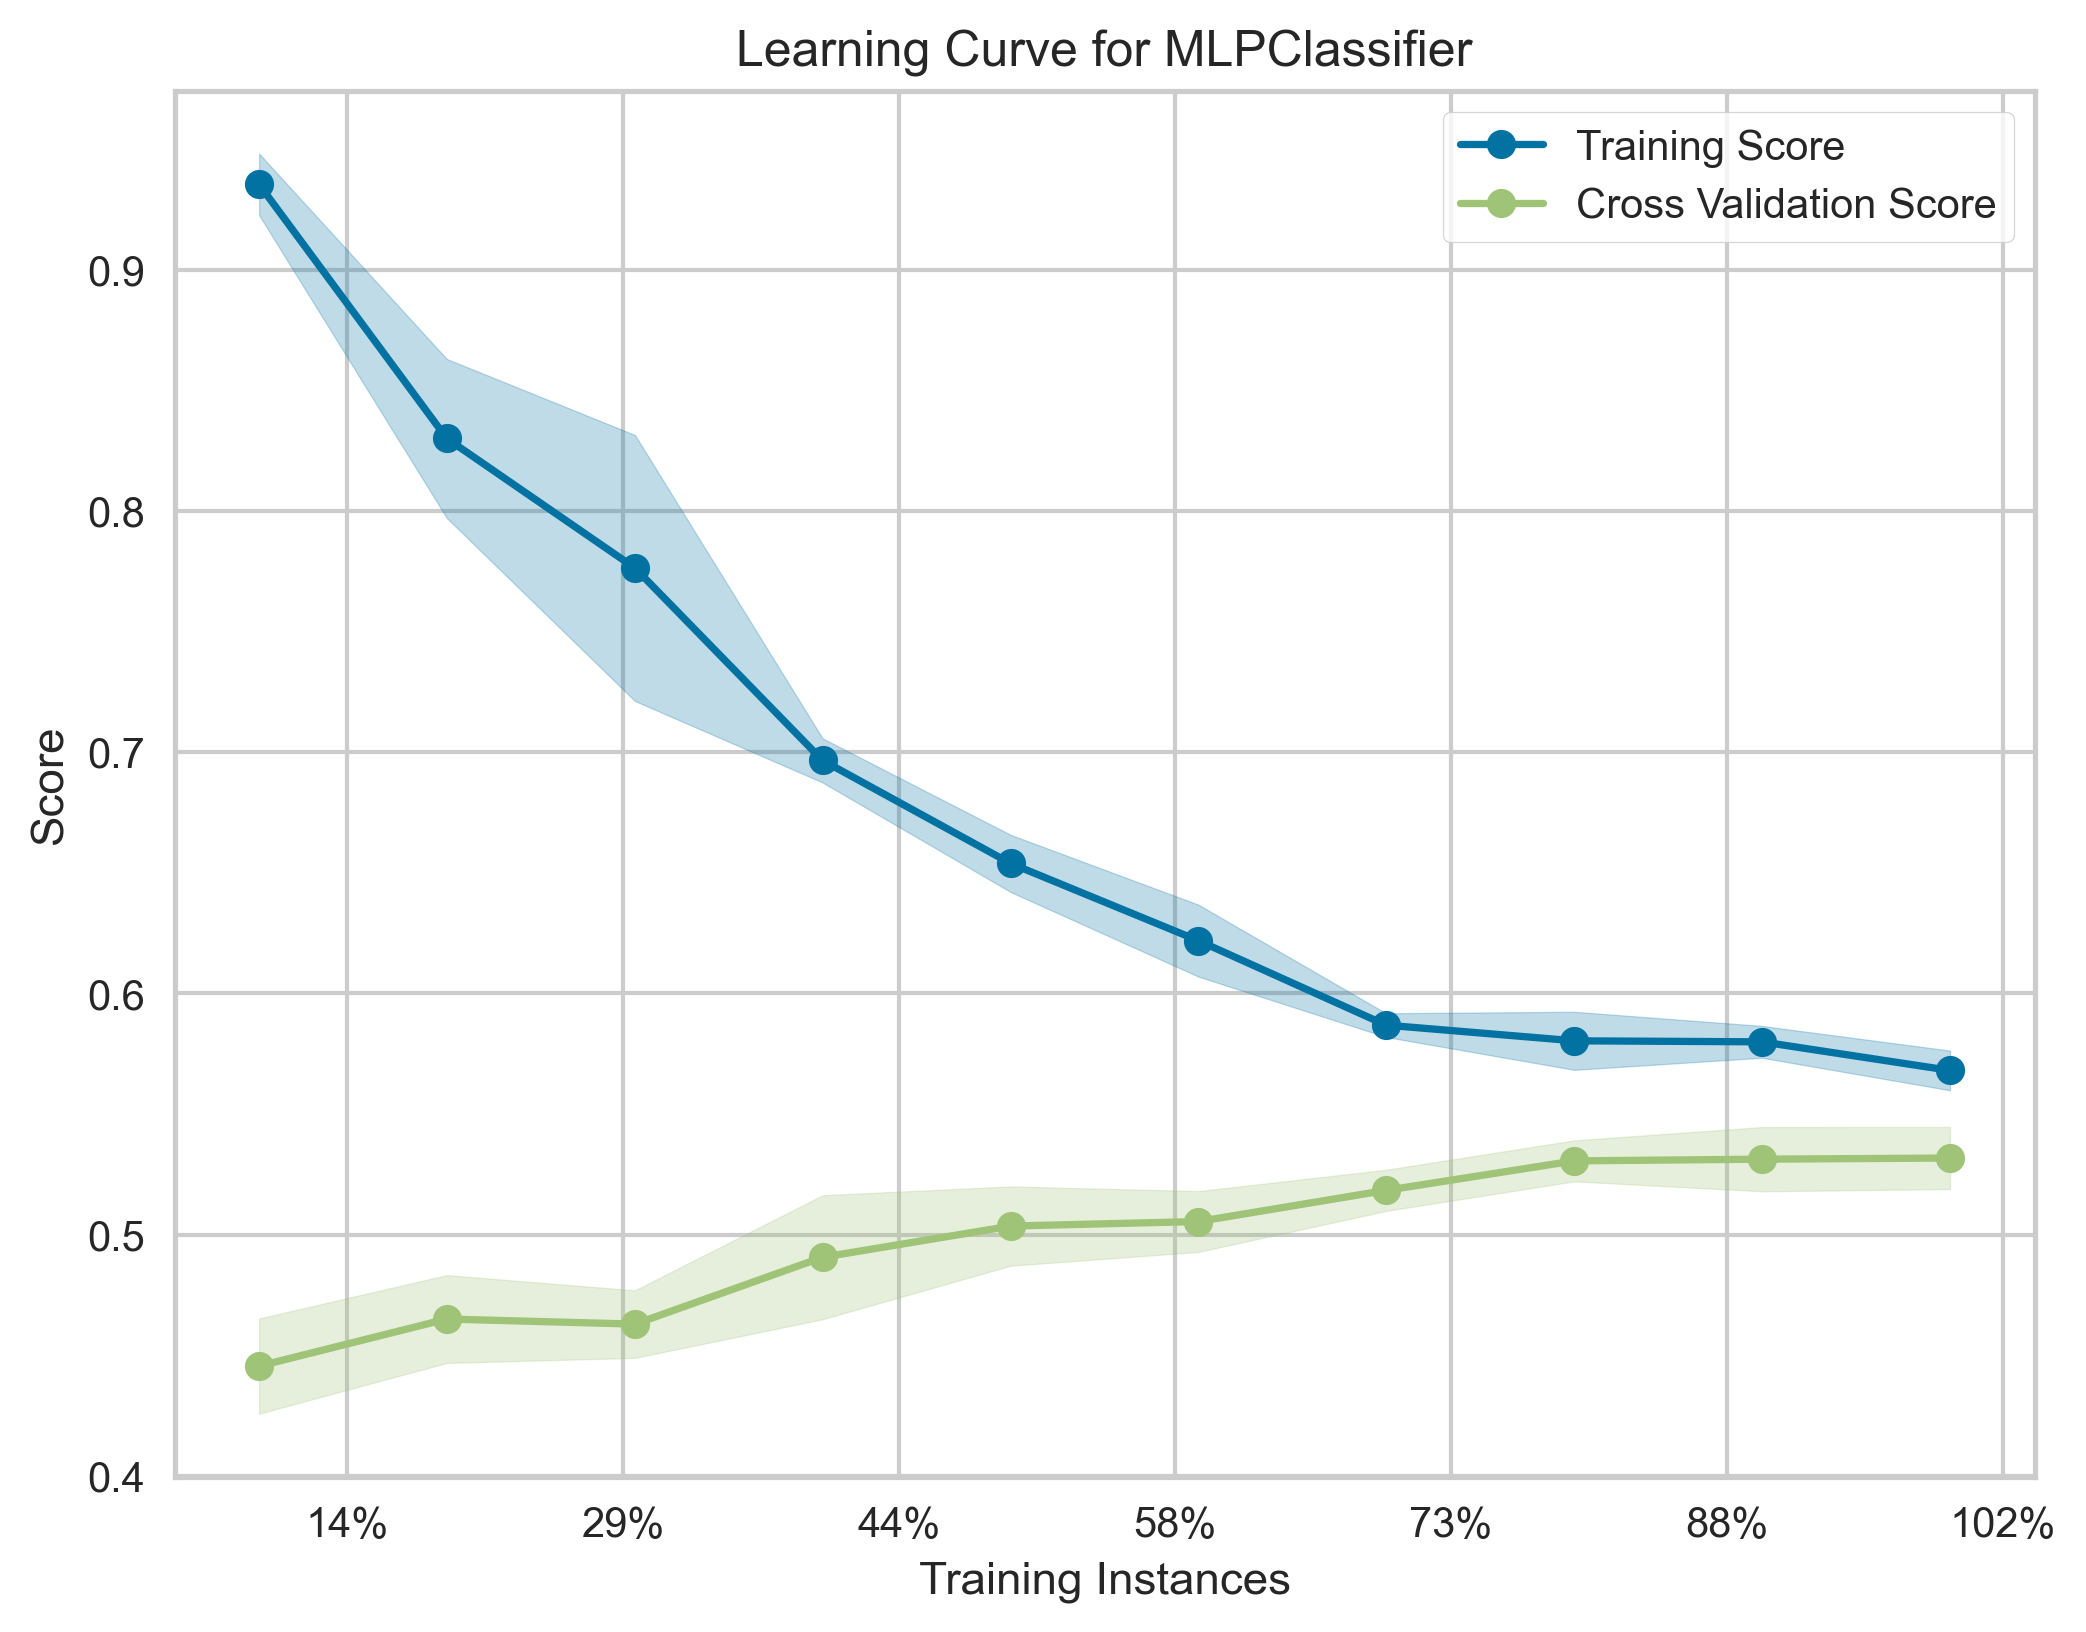

In [49]:
best_mlp_clf_pca = instantiate_best_mlp_clf_pca()
mlp_viz.learning_curve(clf=best_mlp_clf_pca,
                       X_tr=X_train_pca,
                       y_tr=y_train,
                       cv=CV, output_path=f"{STEP_4_PATH}/pca_mlp_learning_curve.png",
                       scoring=F1_SCORE)

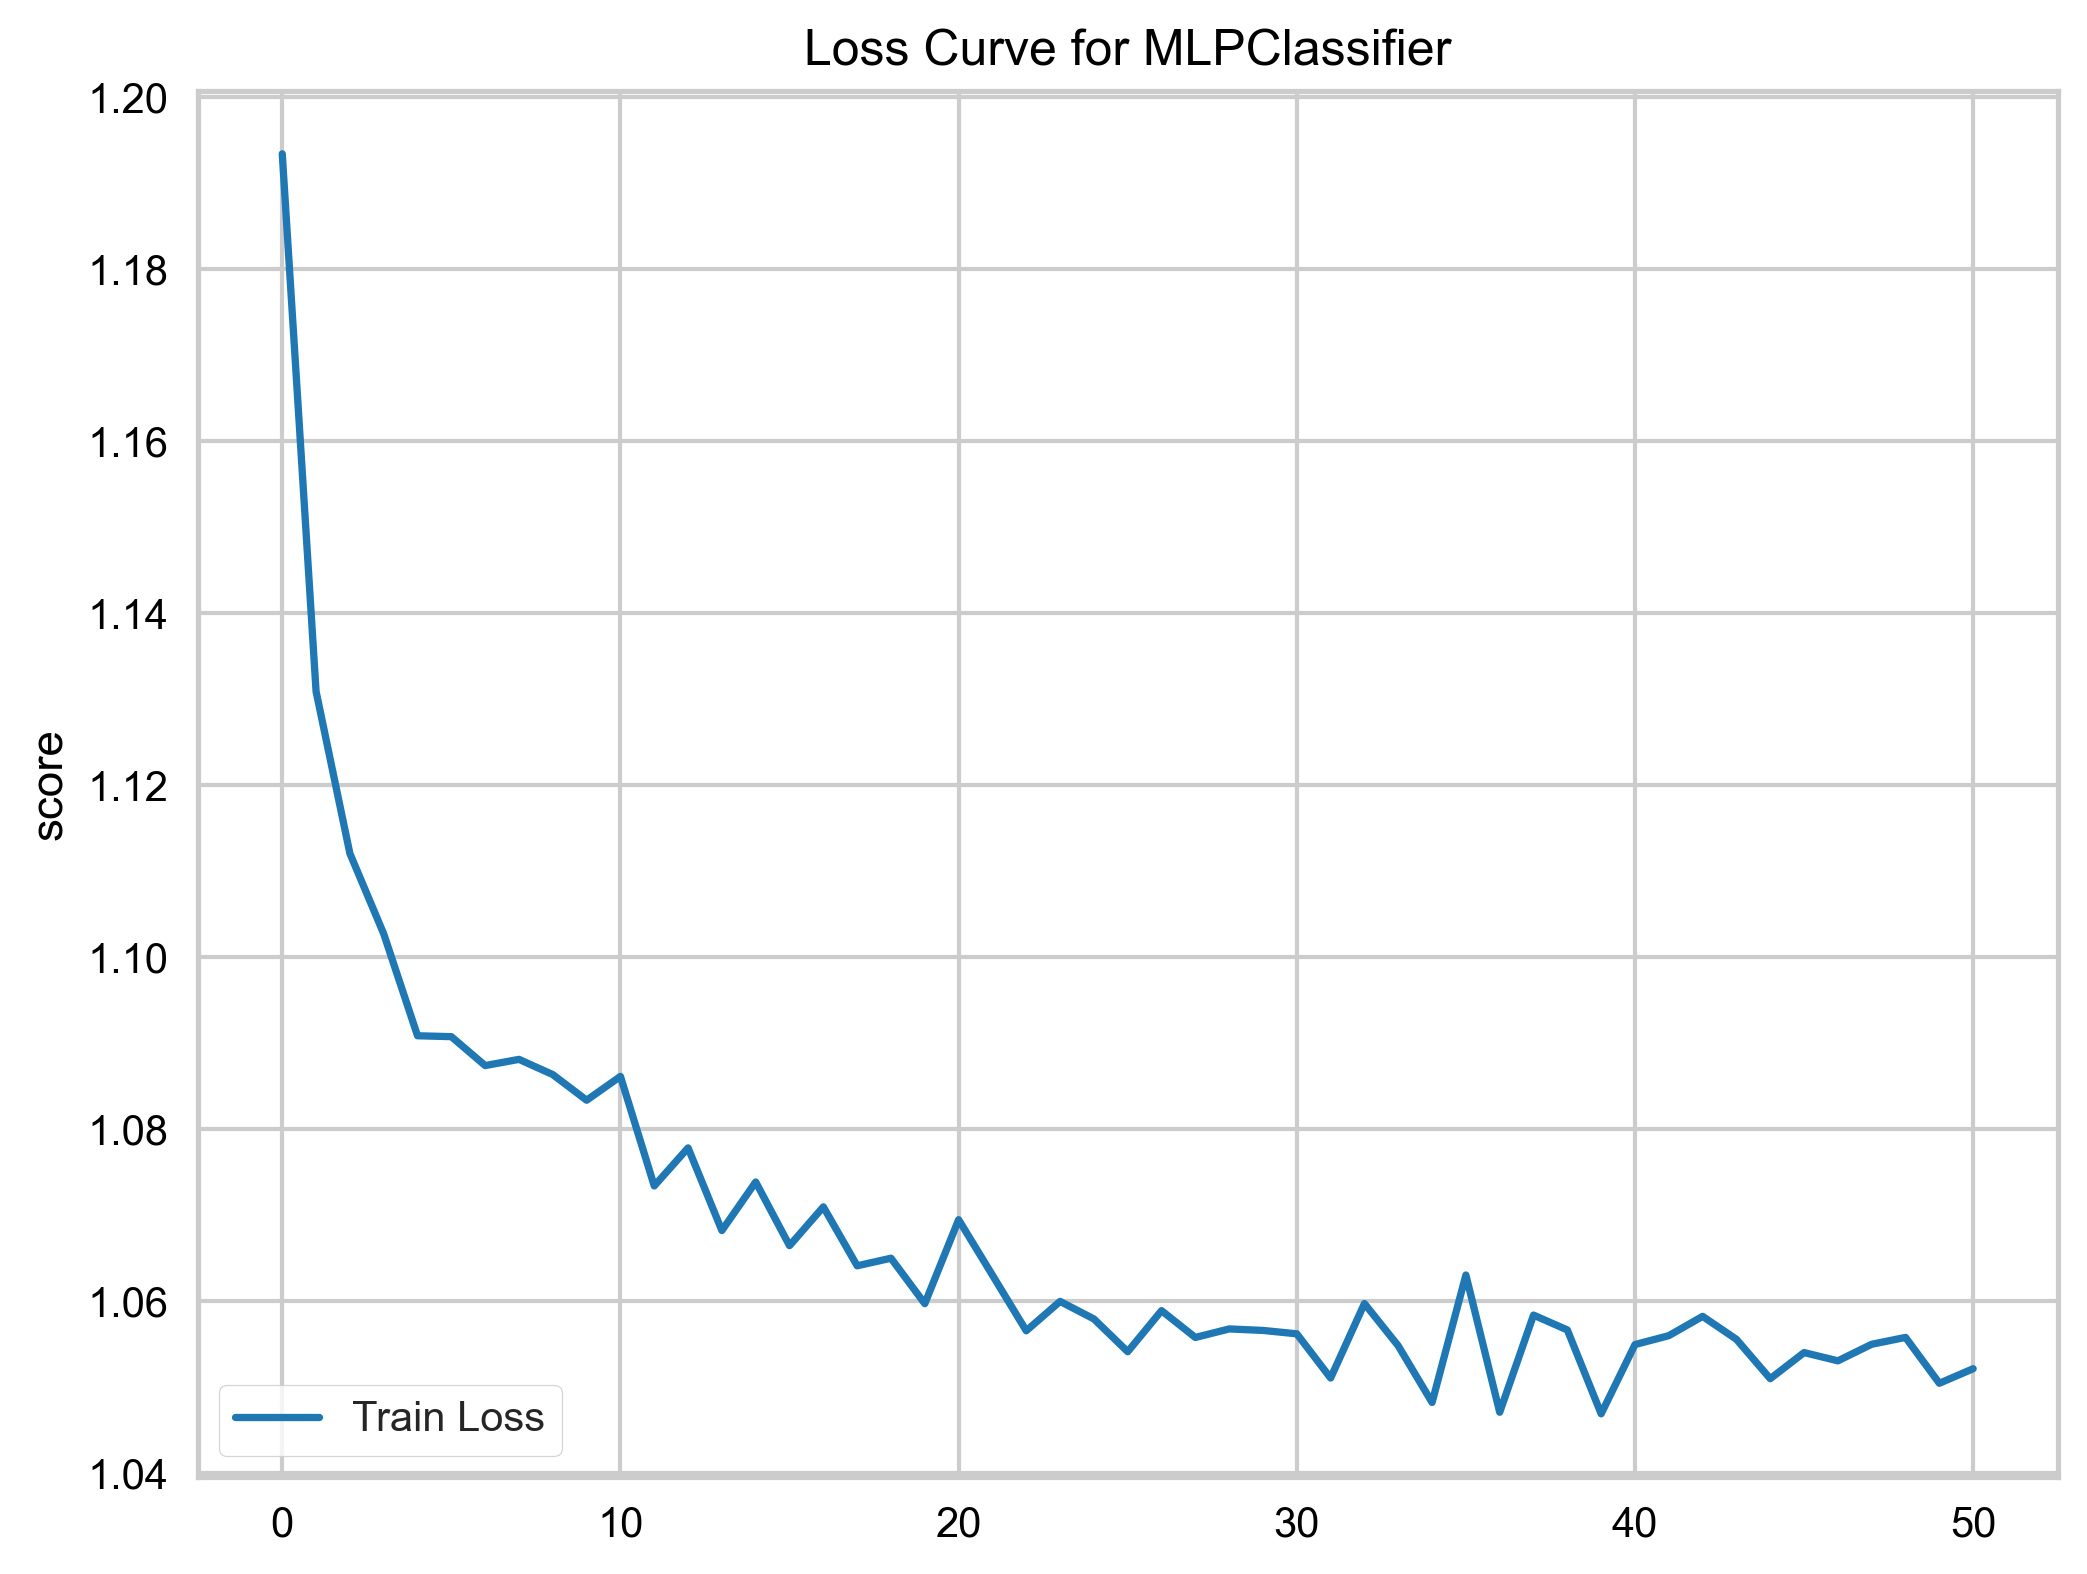

In [50]:
best_mlp_clf_pca = instantiate_best_mlp_clf_pca()
best_mlp_clf_pca.fit(X_train_pca, y_train)

mlp_viz.loss_curve(best_mlp_clf_pca, output_path=f"{STEP_4_PATH}/pca_loss_curves.png")

In [51]:
metrics.f1_score_stats(clf=best_mlp_clf_pca, X_tr=X_train_pca, X_t=X_test_pca, y_tr=y_train, y_t=y_test,
                       averaging=F1_AVERAGING)

F1-Score, micro (train): 0.5444
F1-Score, micro (test) : 0.5141


In [52]:
best_mlp_clf_pca = instantiate_best_mlp_clf_pca()
training.learning_time_stats(best_mlp_clf_pca, X_tr=X_train_pca, y_tr=y_train)

Training time, total: 1.6529 seconds
Training time, normalized (per 1000 samples): 0.3884 seconds


In [53]:
training.inference_time_stats(best_mlp_clf_pca, X_train_pca, proba=False, dataset_name='train')
training.inference_time_stats(best_mlp_clf_pca, X_test_pca, proba=False, dataset_name='test')
training.inference_time_stats(best_mlp_clf_pca, np.concatenate([X_train_pca, X_test_pca], axis=0), proba=False,
                              dataset_name='all')

Inference time (train), total: 0.0020 seconds
Inference time (train), normalized (per 1000 samples): 0.0005 seconds
Inference time (test), total: 0.0006 seconds
Inference time (test), normalized (per 1000 samples): 0.0006 seconds
Inference time (all), total: 0.0021 seconds
Inference time (all), normalized (per 1000 samples): 0.0004 seconds


# Step 5

In [60]:
from sklearn.metrics import silhouette_samples

In [61]:
pca = get_best_pca()[1]

X_train_main_part = pca.fit_transform(X_train)
X_test_main_part = pca.transform(X_test)

kmeans = get_best_kmeans(DummyTransformer())[1]
kmeans.fit(X_train)
X_train_clusters = kmeans.predict(X_train)
X_test_clusters = kmeans.predict(X_test)

X_train_sil = silhouette_samples(X_train, X_train_clusters)
X_test_sil = silhouette_samples(X_test, X_test_clusters)

scaler = StandardScaler()
X_train_new_features = scaler.fit_transform(np.hstack((X_train_clusters.reshape(-1, 1), X_train_sil.reshape(-1, 1))))
X_test_new_features = scaler.transform(np.hstack((X_test_clusters.reshape(-1, 1), X_test_sil.reshape(-1, 1))))

X_train_5 = np.hstack((X_train_main_part, X_train_new_features))
X_test_5 = np.hstack((X_test_main_part, X_test_new_features))


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [62]:
best_mlp_params_step_5 = training.perform_hyperparameter_tuning(
    clf=MLPClassifier(random_state=SEED, hidden_layer_sizes=[30] * 2, max_iter=1000, tol=1e-5),
    X_tr=X_train_5,
    y_tr=y_train,
    cv=CV,
    param_space={
        "alpha": np.logspace(-5, -2, 4),
        "learning_rate_init": np.logspace(-3, -1, 4),
        "batch_size": [16, 32, 64]
    },
    n_jobs=-1,
    scoring=F1_SCORE,
)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/pavponn/opt/anaconda3/envs/assignment-3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/pavponn/opt/anaconda3/envs/assignment-3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/pavponn/opt/anaconda3/envs/assignment-3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/pavponn/opt/anaconda3/envs/assignment-3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be 

In [63]:
best_mlp_params_step_5

{'alpha': 0.001, 'batch_size': 64, 'learning_rate_init': 0.001}

In [64]:
def instantiate_best_mlp_clf_5(max_iter=1000):
    return MLPClassifier(random_state=SEED,
                         hidden_layer_sizes=[30] * 2,
                         max_iter=max_iter,
                         tol=1e-5,
                         batch_size=best_mlp_params_step_5['batch_size'],
                         alpha=best_mlp_params_step_5['alpha'],
                         learning_rate_init=best_mlp_params_step_5['learning_rate_init'])


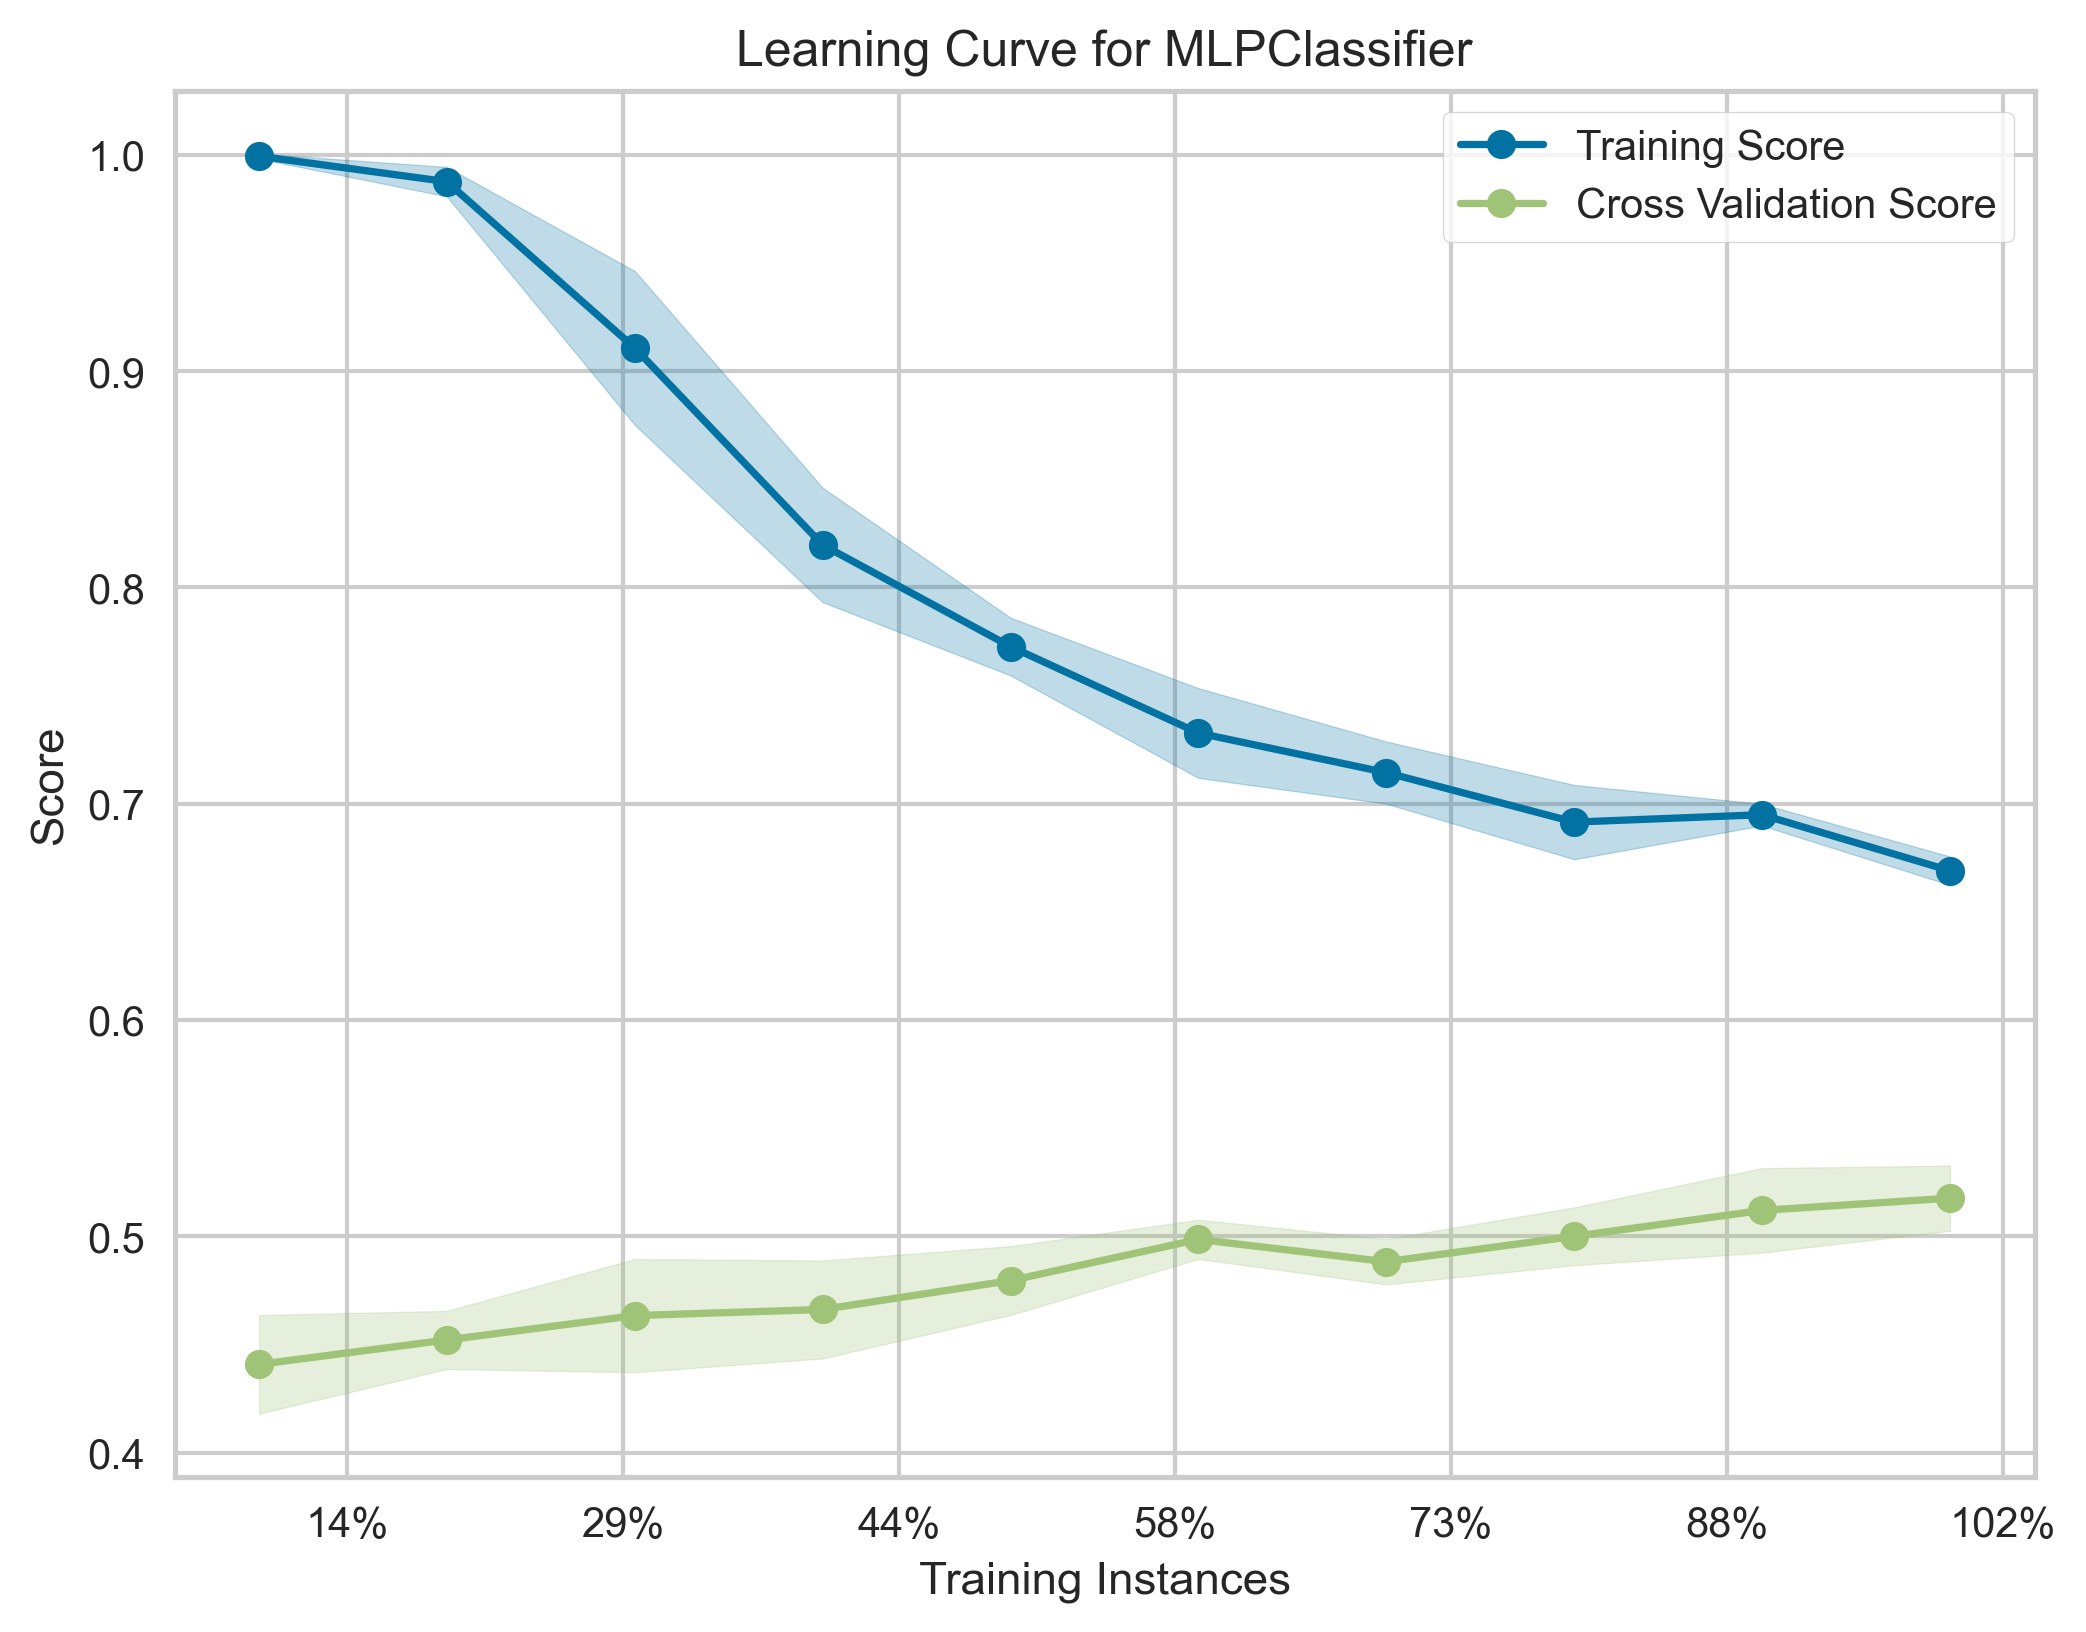

In [65]:
best_mlp_clf_5 = instantiate_best_mlp_clf_5()
mlp_viz.learning_curve(clf=best_mlp_clf_5,
                       X_tr=X_train_5,
                       y_tr=y_train,
                       cv=CV, output_path=f"{STEP_5_PATH}/mlp_learning_curve.png",
                       scoring=F1_SCORE)

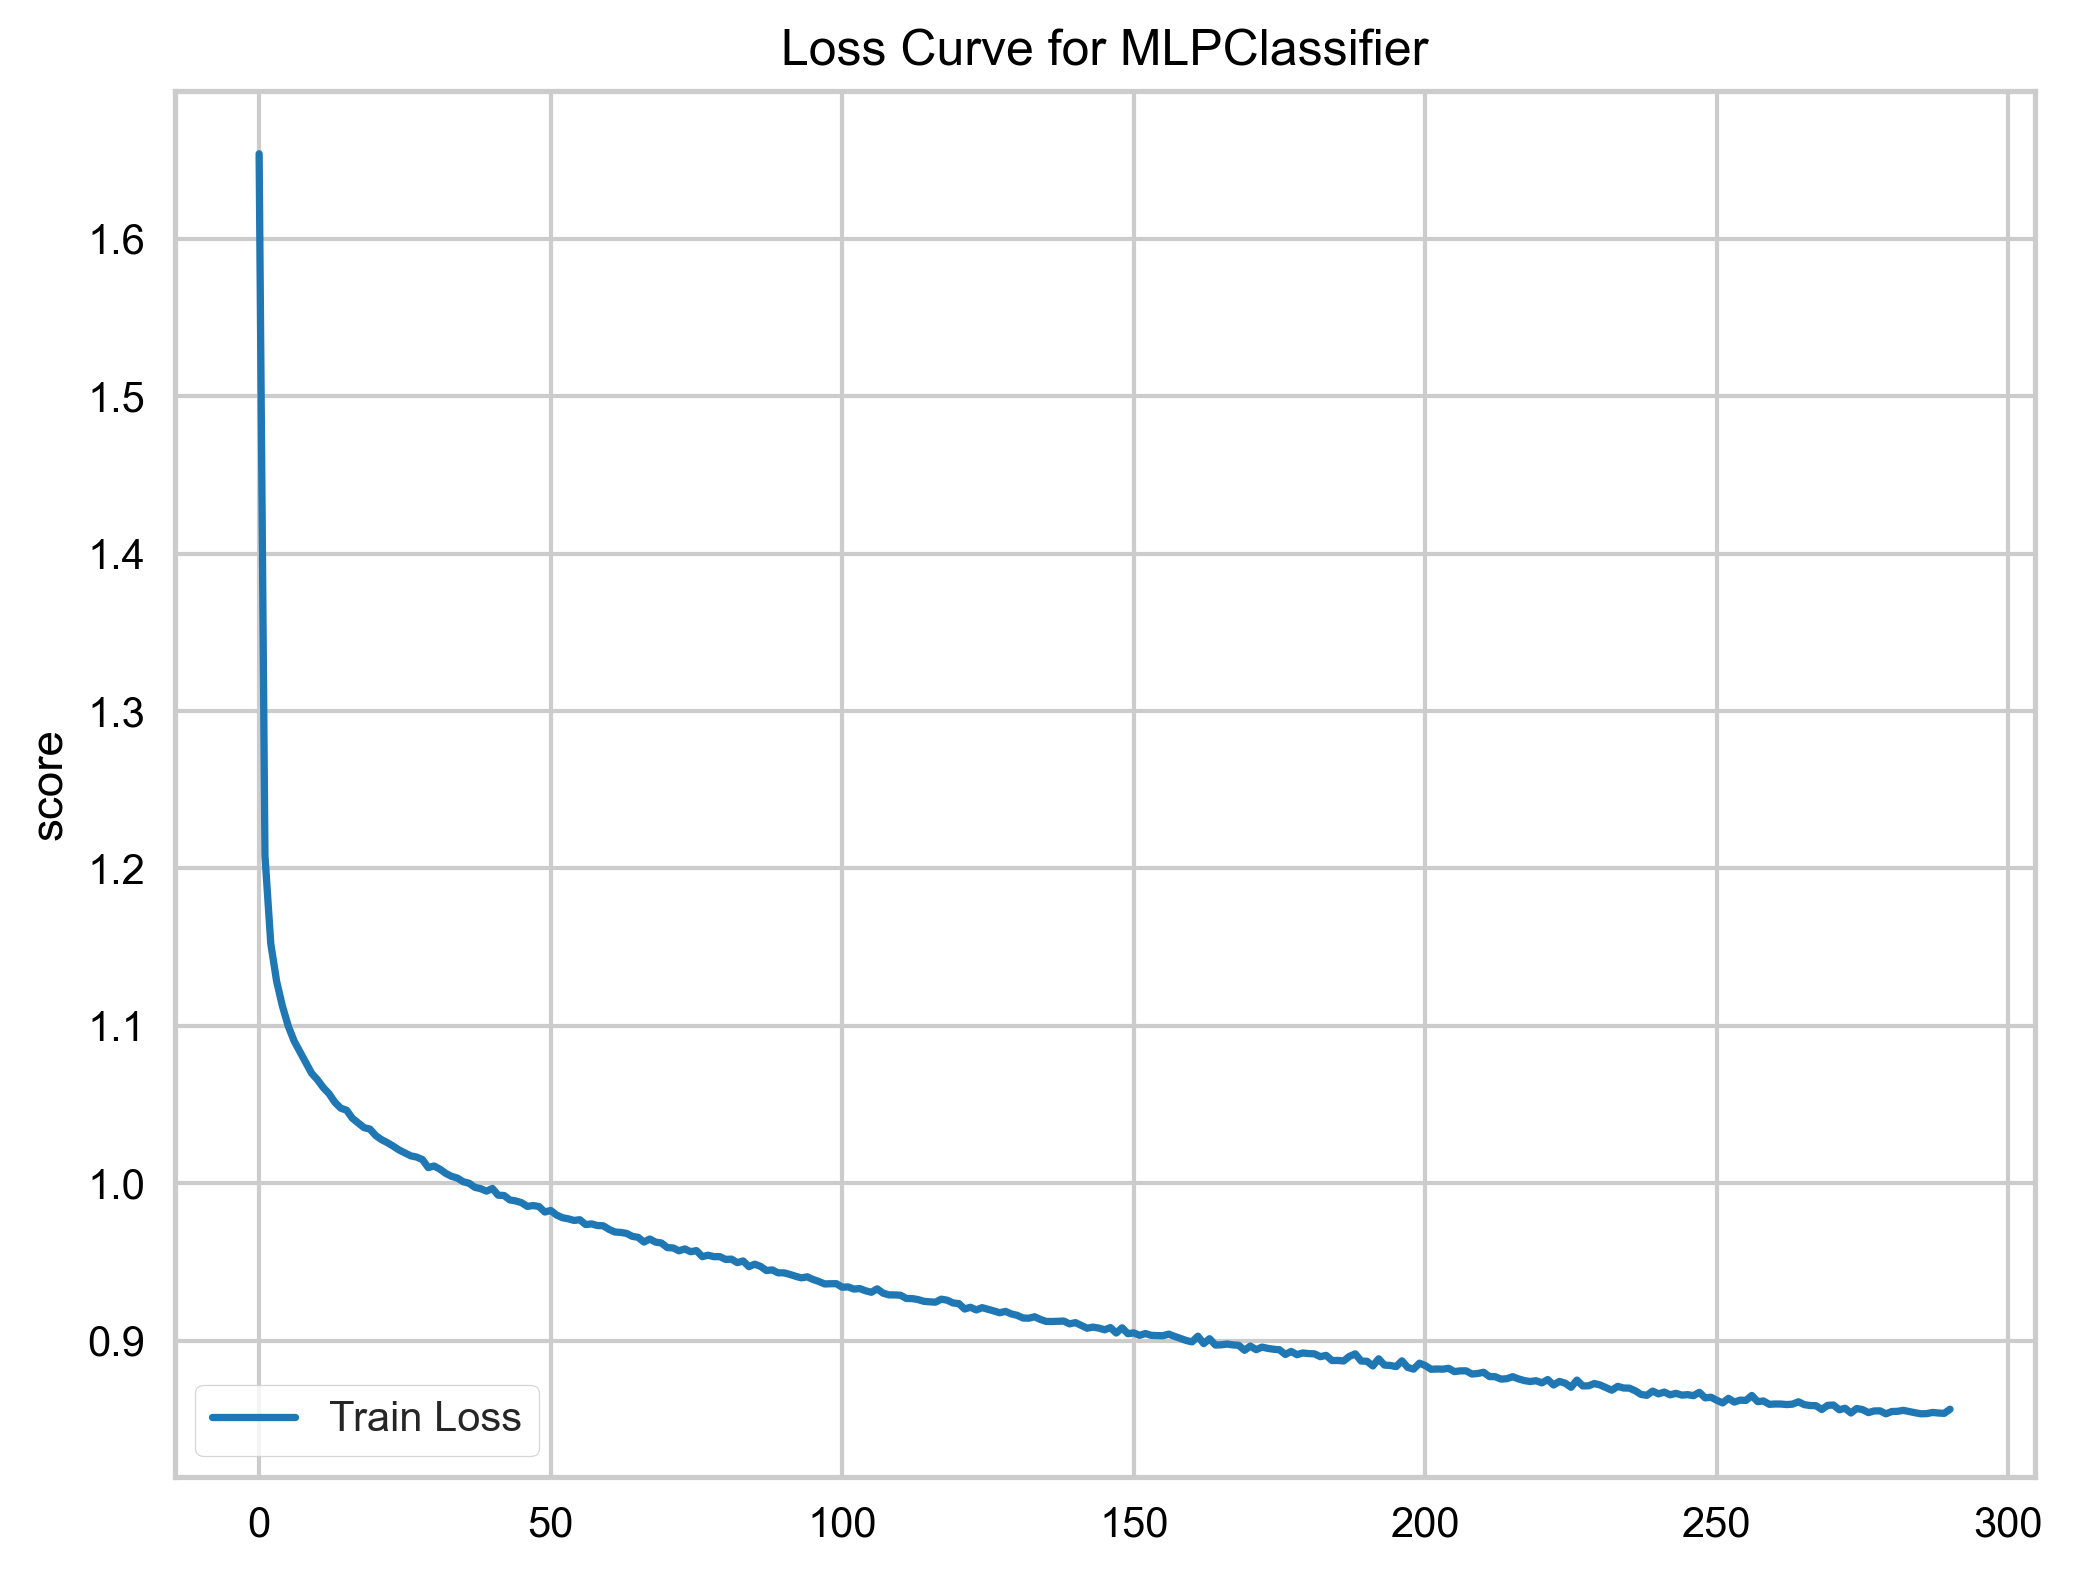

In [66]:
best_mlp_clf_5 = instantiate_best_mlp_clf_5()
best_mlp_clf_5.fit(X_train_5, y_train)

mlp_viz.loss_curve(best_mlp_clf_5, output_path=f"{STEP_5_PATH}/loss_curves.png")

In [67]:
metrics.f1_score_stats(clf=best_mlp_clf_5, X_tr=X_train_5, X_t=X_test_5, y_tr=y_train, y_t=y_test,
                       averaging=F1_AVERAGING)

F1-Score, micro (train): 0.6532
F1-Score, micro (test) : 0.5320


In [68]:
best_mlp_clf_5 = instantiate_best_mlp_clf_5()
training.learning_time_stats(best_mlp_clf_5, X_tr=X_train_5, y_tr=y_train)

Training time, total: 8.7984 seconds
Training time, normalized (per 1000 samples): 2.0673 seconds


In [69]:
training.inference_time_stats(best_mlp_clf_5, X_train_5, proba=False, dataset_name='train')
training.inference_time_stats(best_mlp_clf_5, X_test_5, proba=False, dataset_name='test')
training.inference_time_stats(best_mlp_clf_5, np.concatenate([X_train_5, X_test_5], axis=0), proba=False,
                              dataset_name='all')

Inference time (train), total: 0.0019 seconds
Inference time (train), normalized (per 1000 samples): 0.0004 seconds
Inference time (test), total: 0.0006 seconds
Inference time (test), normalized (per 1000 samples): 0.0006 seconds
Inference time (all), total: 0.0016 seconds
Inference time (all), normalized (per 1000 samples): 0.0003 seconds
